## Import Libraries

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np
import janitor
from sklearn.linear_model import LinearRegression

janitor allows command to find and replace

## Import Household Adult File

In [374]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [375]:
nh.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


## Import Exam File

In [376]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [377]:
exam = ExamFile()

In [380]:
exam.data.shape

(31311, 47)

In [381]:
exam.cols

,description,variable,position,end position,length
0,Respondent identification number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
2363,Time to complete 8-ft walk--trial B(sec),PFPTWLKB,6221,6224.0,4
2364,Number of steps--trial B,PFPNSTPB,6225,6226.0,2
2365,Pain reported on walking,PFPPAIN,6227,NaN,1
2366,Type of device used,PFPDEVIC,6228,NaN,1


## Import Household Youth File

In [382]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [383]:
youth = HouseholdYouthFile()

In [384]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Combine adult and exam files - adult_exam

match files on the SEQN field 

In [385]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [386]:
adult_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 3 to 53623
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           20050 non-null  int64  
 1   HAR23          20050 non-null  int64  
 2   HAR26          20050 non-null  int64  
 3   HAC1E          20050 non-null  int64  
 4   HAC1F          20050 non-null  int64  
 5   HAC1G          20050 non-null  int64  
 6   HAC1O          20050 non-null  int64  
 7   HAL6           20050 non-null  int64  
 8   HAL10          20050 non-null  int64  
 9   HAL1           20050 non-null  int64  
 10  HAL3           20050 non-null  int64  
 11  HAL5           20050 non-null  int64  
 12  DMARACER       20050 non-null  int64  
 13  DMARETHN       20050 non-null  int64  
 14  DMAETHNR       20050 non-null  int64  
 15  HSSEX          20050 non-null  int64  
 16  HSAGEIR        20050 non-null  int64  
 17  HSAGEU         20050 non-null  int64  
 18  HXPAXT

## Combine youth and exam files - youth_exam

In [395]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [447]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

In [448]:
youth_exam.query('HSAGEIR < 18').shape

(13944, 62)

# Hankinson Exclusion

Ages - have none over 89; 17-89
20,050 patients in adult exam file (age > 0)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [449]:
adult_exam.query('HSAGEIR>0').shape

(20050, 68)

Any spirometry  H 16484 

20050 adult in exam file
16840  adult did spirometry

## SPPMANEU - # acceptable trials

According to the NHANES documentation, the values for SPPMANEU (number of acceptable trials)

00 150; 01-16 20836. 88 1445 blank 8880

so total spirometry is 150 + 20836 = 20986, but this doesn't match, looking at data base values which has 16840 with SPPMANEU 0 to <88

In [450]:
adult_exam.SPPMANEU.value_counts()

5.0     7569
6.0     2553
4.0     1932
7.0     1544
88.0    1310
8.0     1238
3.0      668
9.0      400
2.0      292
10.0     233
1.0      226
0.0      144
11.0      23
13.0       8
12.0       8
14.0       1
16.0       1
Name: SPPMANEU, dtype: int64

adult_exam.SPPMANEU.value_counts()

In [451]:
adult_exam.query('SPPMANEU != 88').shape

(18740, 68)

In [452]:
adult_exam.query('SPPMANEU > -1 & SPPMANEU < 88').shape

(16840, 68)

## total with spirometry 16840
total 2 or more spirometry 16470

## number 2 or more acceptable trials  H 277, 16207  we have 16470 (+263)

In [453]:
adult_exam.query('2 <= SPPMANEU < 88').shape

(16470, 68)

In [454]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88').shape

(16470, 68)

### SPPREPRO = 4 both FVC and FEV1 reproducible; 1 FVC not reproducible; 2 FEV1 no reprod 3 neither FVC or FEV1 reproducible
What closely matches Hankinson is to take subjects with FEV1 reproducible or both FEV1 and FVC reproducible
15286 have 2 or more, both FEV1 and FVC reproducible
16289 have 2 or more, FEV1 reproducible - use that criteria (=4 | =1)

In [455]:
adult_exam.SPPREPRO.value_counts()

4.0    15373
8.0     1454
1.0     1003
3.0      267
2.0       53
Name: SPPREPRO, dtype: int64

In [456]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88 & SPPREPRO == 4').shape

(15286, 68)

In [457]:
adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)').shape

(16289, 68)

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [458]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

(16386, 68)

In [459]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('HSAGEIR < 90').shape)

(16215, 68)

In [460]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('MXPAXTMR < 1080').shape)

(16027, 68)

## and age <90 16386, 16215

# first number is with 2 or more spirometries and = the parameter; 2nd is 2 or more with reproducible FEV1 with not the parameter

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [461]:
adult_exam.DMARETHN.value_counts()

1    8483
2    5486
3    5306
4     775
Name: DMARETHN, dtype: int64

In [462]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

(639, 68)

In [463]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape)

(15747, 68)

In [464]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').shape)

(15395, 68)

# and race not other 15747, 15580

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [465]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

or statement not work, so need HAR1 = 2

In [466]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

(9799, 68)

In [467]:
adult_exam.query('HAR1 == 1 | HAR1 == 8').shape

(9815, 68)

In [468]:
adult_exam.query('HAR1 == 2').shape

(10235, 68)

age<90 & ethnicity not other and not smoker(HAR1==2)

In [469]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

(7960, 68)

# and not smoker('not HAR1==1') 7960, 7851

In [470]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape

(7960, 68)

In [471]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1').shape)

(7764, 68)

HXPG1 how many cigarettes past 5 days. 0, #, or 888 applicable  SO '0 < HXPG1 < 888'
65 smoke cigarettes past 5 days

In [472]:
adult_exam.query('0 < HXPG1 < 888').shape

(65, 68)

include those not smoking cigarettes 5 days

In [473]:
adult_exam.query('not (0 < HXPG1 < 888)').shape

(19985, 68)

In [474]:
adult_exam.query('(HXPG1 ==0) | (HXPG1 == 888)').shape

(392, 68)

HXPG2A -pipes

In [475]:
adult_exam.query('0 < HXPG2A < 88').shape

(6, 68)

HXPG2B - cigars

In [476]:
adult_exam.query('0 < HXPG2B < 88').shape

(1, 68)

adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

cigs, pipe, cigars

In [477]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('MYPB11 ==1').shape

(0, 68)

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [478]:
adult_exam.HAR23.value_counts()

2    17951
1     2073
8       21
9        5
Name: HAR23, dtype: int64

In [479]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

(7676, 68)

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [480]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

In [481]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 68)

In [482]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2')
 .query('HAR23 == 2').query('not HAR26 == 1').shape)

(7638, 68)

In [483]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

(7531, 68)

In [484]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

(7454, 68)

# and not cigar or pipe smoker 7634, 7531

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  

SPQ4 cough, cold or other acute illness;  SPQ3 smoked, ate in past hour

In [485]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

In [486]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

(5965, 68)

In [487]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

(7540, 68)

# add exclude if smoked in 5 days - only 2 more excluded 7632, 7529

In [488]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

(19979, 68)

In [489]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7632, 68)

In [490]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7529, 68)

In [606]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7454, 68)

In [604]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7454, 68)

In [491]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7454, 68)

In [492]:
adult_exam.HAC1E.value_counts()

2    18672
1     1376
9        1
8        1
Name: HAC1E, dtype: int64

In [493]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [494]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7158, 68)

# and asthma (7156 , 7060)

In [495]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7156, 68)

In [496]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

(7060, 68)

In [497]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

(6987, 68)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [498]:
adult_exam.HAC1F.value_counts()

2    18914
1     1134
9        2
Name: HAC1F, dtype: int64

In [499]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6962, 68)

# and chronic bronchitis (6960, 6868 subjects remaining)

In [500]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6960, 68)

In [501]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

(6868, 68)

In [502]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

(6797, 68)

and emphysema  H 15, 6465  HAC1G == 2


In [503]:
adult_exam.HAC1G.value_counts()

2    19614
1      430
9        5
8        1
Name: HAC1G, dtype: int64

In [504]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

(6945, 68)

# and emphysema (6943, 6852 remaining)

In [505]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2').shape)

(6943, 68)

In [506]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

(6852, 68)

In [507]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

(6782, 68)

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [508]:
adult_exam.HAC1O.value_counts()

2    19266
1      780
9        3
8        1
Name: HAC1O, dtype: int64

In [509]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

(6756, 68)

and wheezing 6 month  H 419 6046  HAL6

In [510]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

In [511]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

(6495, 68)

and whistling or wheezing  H 112 5934  HAL10

In [512]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

# and wheezing 12 months 6493, 6408

In [513]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2').shape)

(6493, 68)

In [514]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

(6408, 68)

In [515]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

(6341, 68)

# and wheezing 12 months not=1

In [516]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('not HAL6 == 1').shape)

(6494, 68)

In [517]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

(6368, 68)

# and wheezing apart from colds 6366, 6285

In [518]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2')
 .query('HAL10 == 2').shape)

(6366, 68)

In [519]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

(6285, 68)

In [520]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

(6220, 68)

In [521]:
adult_exam.HAL10.value_counts()

2    17958
1     2072
8       14
9        6
Name: HAL10, dtype: int64

and persistent cough H 158, 5776  HAL1

# and not persistent cough 6200, 6121

In [522]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

(6200, 68)

In [523]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

(6121, 68)

In [524]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

(6059, 68)

In [525]:
adult_exam.HAL1.value_counts()

2    18461
1     1582
8        6
9        1
Name: HAL1, dtype: int64

# and not persistent phlegm H 125  5776  HAL 3, 6065,5990

In [526]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

(6065, 68)

In [527]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

(5990, 68)

In [528]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

(5930, 68)

# and moderate shortness of breath H  848  4803  HAL5  5151 5116

In [529]:
adult_exam.HAL3.value_counts()

2    18330
1     1705
8       12
9        3
Name: HAL3, dtype: int64

In [530]:
adult_exam.HAL5.value_counts()

2    14910
1     5030
8       64
9       46
Name: HAL5, dtype: int64

In [531]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

(5116, 68)

In [532]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

(5073, 68)

In [533]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

(5151, 68)

In [534]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

(5122, 68)

# and age < 80H  139 4634  HSAGEIR 4944, 4925


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

<82 has 4944; <81 has 4907; HSAITMOR<960 has 4905

In [535]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
# .query('HAL5 == 2').query('HSAGEIR < 80').shape)
.query('HAL5 == 2').query('HSAITMOR< 960').shape) 
 

(4905, 68)

In [536]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .shape)

(4883, 68)

In [537]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('MXPAXTMR < 960')
 .shape)

(4863, 68)

and have value for FEV3 - 22

In [538]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

(4862, 68)

In [539]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('MXPAXTMR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

(4863, 68)

and have value for HSAITMOR - 1 ; one deleted from 4903 to 4902 (with ageIR <81; but change to HSAITMOR<960


In [540]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

(4862, 68)

In [541]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR<960')
 .query('not SPPFEV3 == 88888')
 .query('not HSAITMOR == 9999')
 .shape)

(4862, 68)

In [542]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('MXPAXTMR < 960')
 .query('not SPPFEV3 == 88888')
 .query('not MXPAXTMR == 9999')
 .shape)

(4863, 68)

## Now create DataFrame adult_final of the final rows selected

set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

Not use this adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [543]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1').query('not HAC1G == 1')
 .query('not HAL6 == 1').query('not HAL10 == 1')
 .query('not HAL1 == 1').query('not HAL3 == 1').query('not HAL5 == 1')
 .query('HSAITMOR < 960') .query('not SPPFEV3 == 88888')
 .query('not HSAITMOR == 9999'))

In [544]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1').query('not HAC1G == 1')
 .query('not HAL6 == 1').query('not HAL10 == 1')
 .query('not HAL1 == 1').query('not HAL3 == 1').query('not HAL5 == 1')
 .query('HSAITMOR < 960') .query('not SPPFEV3 == 88888')
 .query('not HSAITMOR == 9999'))

In [545]:
af = adult_final

In [546]:
af.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862 entries, 3 to 53623
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           4862 non-null   int64  
 1   HAR23          4862 non-null   int64  
 2   HAR26          4862 non-null   int64  
 3   HAC1E          4862 non-null   int64  
 4   HAC1F          4862 non-null   int64  
 5   HAC1G          4862 non-null   int64  
 6   HAC1O          4862 non-null   int64  
 7   HAL6           4862 non-null   int64  
 8   HAL10          4862 non-null   int64  
 9   HAL1           4862 non-null   int64  
 10  HAL3           4862 non-null   int64  
 11  HAL5           4862 non-null   int64  
 12  DMARACER       4862 non-null   int64  
 13  DMARETHN       4862 non-null   int64  
 14  DMAETHNR       4862 non-null   int64  
 15  HSSEX          4862 non-null   int64  
 16  HSAGEIR        4862 non-null   int64  
 17  HSAGEU         4862 non-null   int64  
 18  HXPAXTM

In [608]:
nh.cols[nh.cols.description.str.contains(' age')]

,description,variable,position,end position,length
192,"No insur: poor health, illness, age(ph1)",HFB14AC,1280,NaN,1
218,Parent high blood cholesterol at any age,HFC6C,1308,NaN,1
220,Parent asthma or hay fever at any age,HFC6D,1310,NaN,1
222,Parent diabetes at any age,HFC6E,1312,NaN,1
300,Family reference person age - years,HFHAGER,1418,1420.0,3
308,Respondent age in years,HFAGERR,1431,1433.0,3
315,Check Item. Refer to age of SP,HAA3,1444,NaN,1
479,Check item. Refer to age of SP,HAG1,1671,NaN,1
512,Check item. Refer to age of SP,HAG13,1719,NaN,1
613,Check item. Refer to age of SP,HAJ0,1821,NaN,1


In [607]:
nh.cols[nh.cols.description.str.contains('height')]

,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1301,NaN,1
213,Father's height calculated in inches,HFC5S,1303,NaN,1


In [612]:
nh.cols[nh.cols.variable.str.contains('HFC3S')]

,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1301,NaN,1


In [619]:
exam.cols[exam.cols.description.str.contains('height ')]

,description,variable,position,end position,length
382,Standing height (cm) (2 years and over),BMPHT,1528,1532.0,5
383,Standing height source flag,BMPHTFLG,1533,NaN,1
384,Standing height (in) (2 years and over),BMPHTIN,1534,1538.0,5
387,Sitting height (cm) (2 years and over),BMPSITHT,1545,1549.0,5
388,Self reported height (in) (12-16 years),BMPSRHIS,1550,1552.0,3
390,Knee height (cm) (60 years and over),BMPKNEE,1557,1560.0,4


In [620]:
youth.cols[youth.cols.description.str.contains('height ')]

,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1224,1226.0,3
213,Father's height calculated in inches,HFC5S,1230,1232.0,3


# Need 
find those with BMPHTIN differ from BMPHT * 2.54; do scatterplot of that and of self-reported height
need import BMPHTIN AND BMPSRHIS

In [548]:
af.SPPFEV1

SEQN
3        4640.0
4        3089.0
52       4658.0
60       3651.0
84       3147.0
          ...  
53558    2626.0
53567    3348.0
53592    3642.0
53593    5214.0
53623    3196.0
Name: SPPFEV1, Length: 4862, dtype: float64

## Now do youth exclusion

In [549]:
youth_exam.shape

(13944, 62)

In [554]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

Hankinson age 8 to 16 4143
We have 13944 youth in exam file
4146 youth did spirometry all ages
5365 age 8 between 7 and 17, same age between 7 and 20
4488 age >96 mo; 4538 age >95 mo
4076 age 8 and older with at least 2 spirometry vs 4103 Hankinson
need do scatter plot of age(month) vs age to see why off


In [551]:
youth_exam.query('HSAGEIR > 7').shape

(5365, 62)

age at exam 8 (96 months) and above

In [556]:
youth_exam.query('MXPAXTMR >95').shape

(4323, 62)

In [595]:
youth_exam.query('MXPAXTMR >95.99').shape

(4323, 62)

age 8 - 16  (204 is age 17)

In [557]:
youth_exam.query('95 < MXPAXTMR < 204').shape

(4291, 62)

age 17 and above on exam - 32, 27 are less than 1 mo over 17, and 5 are 2 mo over 17 - so include all

In [560]:
youth_exam.query('MXPAXTMR > 203.9').shape

(32, 62)

In [563]:
youth_exam.query('MXPAXTMR > 204').shape

(5, 62)

In [564]:
youth_exam.query('MXPAXTMR > 205').shape

(0, 62)

In [345]:
youth_exam.query('7 < HSAGEIR < 20').shape

(5365, 60)

In [ ]:
youth_exam.query('7 < HSAGEIR < 17').shape

13944 youth in exam file
4146  youth did spirometry

In [566]:
youth_exam.query('MXPAXTMR > 95').shape

(4323, 62)

13944 youth, 13113 had exam, 6487 5 over exam, 4323 8 over exam


In [628]:
youth_exam.query('MXPAXTMR > 0').shape

(13113, 62)

In [624]:
youth_exam.query('MXPAXTMR > 59').shape

(6487, 62)

In [104]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').shape

(4146, 60)

In [644]:
youth_exam.query('(SPPMANEU < 88)').shape

(4146, 62)

In [645]:
youth_exam.query('(SPPMANEU > 88)').shape

(0, 62)

In [647]:
youth_exam.query('(SPPMANEU == 88)').shape

(135, 62)

!= gets those that are blank as well as those not equal to

In [648]:
youth_exam.query('(SPPMANEU != 88)').shape

(13809, 62)

In [641]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR < 97').shape

(13, 62)

All youth having spirometry were month 96 to 17y 3 mo

In [649]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR < 96').shape

(0, 62)

In [630]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR > 59').shape

(4146, 62)

In [631]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR > 95').shape

(4146, 62)

age 8-17

Total youth exam

In [107]:
youth_exam.query('HSAGEIR > 0').shape

(13944, 60)

total youth with medical exam (have exam age month)

In [600]:
(youth_exam.query('MXPAXTMR > 95')
.shape)

(4323, 62)

In [601]:
(youth_exam.query('MXPAXTMR < 96')
.shape)

(8790, 62)

In [602]:
(youth_exam.query('MXPAXTMR > 0')
.shape)

(13113, 62)

5230 age 8- and at least one spirometry

In [369]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('SPPMANEU !=88')
.shape)

(5230, 60)

In [597]:
(youth_exam.query('MXPAXTMR > 95')
.query('SPPMANEU !=88')
.shape)

(4188, 62)

In [108]:
youth_exam.DMARETHN.value_counts()

1    4602
3    4445
2    4141
4     756
Name: DMARETHN, dtype: int64

spirometry >1 curve

In [653]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > -1 & SPPMANEU < 88)')
.shape)

(4146, 62)

In [657]:
(youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)')
.shape)

(4146, 62)

In [652]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('SPPFEV1 > 0')
.shape)

(4281, 62)

In [650]:
(youth_exam.query('(SPPMANEU > 1 & SPPMANEU < 88)')
.shape)

(4114, 62)

spirometry unusable <2 curves and reproducible FEV1

In [109]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

(4076, 60)

In [580]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

(4076, 62)

In [110]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

(4114, 60)

ethnicity other

In [111]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

(3928, 60)

In [568]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

(3890, 62)

In [581]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

(3890, 62)

In [113]:
youth_exam.MYPB1.value_counts()

2.0    3394
1.0     724
8.0     162
9.0       1
Name: MYPB1, dtype: int64

MYPB1 smoked at least one cigarette - too many so not use
MYPB11 cigarettes smoked in the past 5 days
MYPB3 smoked 100+cigarettes in life
MYPB27A pipes past 5 days
MYPB27B cigars past 5 days

In [114]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

(3238, 60)

In [115]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

(3813, 60)

In [116]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

(3775, 60)

In [582]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

(3775, 62)

smoked 5 days B11 and B27

In [117]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

(3594, 60)

and B27

In [118]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

(3593, 60)

In [119]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

(3555, 60)

In [583]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

(3555, 62)

asthma E1g

In [120]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

(3268, 60)

In [121]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

(3232, 60)

In [584]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

(3232, 62)

chronic bronchitis E1h

In [122]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

(3180, 60)

In [123]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

(3145, 60)

In [585]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

(3145, 62)

wheezing 12 months

In [124]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

(2899, 60)

In [125]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

(2867, 60)

In [586]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

(2867, 62)

wheezing apart from colds

In [126]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

(2848, 60)

In [127]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

(2816, 60)

In [587]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

(2816, 62)

Youth 12 years and older with above H 1298

In [128]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

(1305, 60)

In [129]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('HSAGEIR > 11')
.shape)

(1294, 60)

and not persistent cough G2 H 2816 **I all age

In [130]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

(2832, 60)

In [131]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

(2800, 60)

In [588]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

(2800, 62)

and not persistent phlegm G4 H 2806

In [132]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

(2822, 60)

In [133]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

(2790, 60)

In [589]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

(2790, 62)

and Youth age 8-under 12

In [134]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

(1543, 60)

In [135]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('HSAGEIR < 12')
.shape)

(1522, 60)

and not persistent cough G6 and G7

In [136]:
youth_exam.HYG7.value_counts()

1.0      1071
2.0       959
3.0       588
4.0       333
555.0     294
6.0       117
5.0       115
12.0       48
10.0       29
8.0        26
7.0        24
999.0      18
20.0       18
888.0      16
24.0       12
15.0        8
9.0         4
30.0        2
120.0       1
104.0       1
60.0        1
13.0        1
11.0        1
25.0        1
35.0        1
14.0        1
Name: HYG7, dtype: int64

In [137]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

(2812, 60)

In [138]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

(2780, 60)

In [590]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

(2780, 62)

and have valid height

In [139]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.shape)

(2779, 60)

In [592]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.shape)

(2779, 62)

and have FEV3 value and age in month

In [140]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999')
.shape)

(2779, 60)

In [578]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999')
.shape)

(2779, 62)

In [658]:
(youth_exam
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999')
.shape)

(2779, 62)

## Create youth_final

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

not use anymore youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [141]:
youth_final = (youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999'))

In [142]:
youth_final.shape

(2779, 60)

In [ ]:
Check age month vs ager

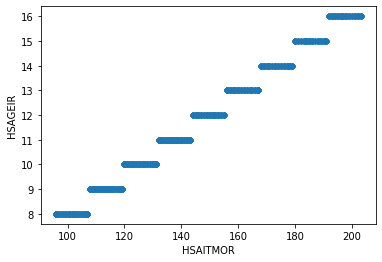

In [371]:
youth_final.plot.scatter('HSAITMOR','HSAGEIR')

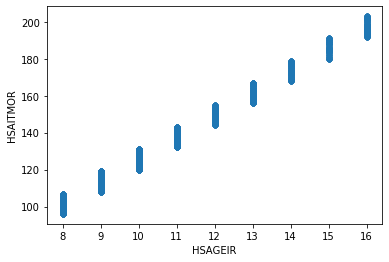

In [372]:
youth_final.plot.scatter('HSAGEIR', 'HSAITMOR')

In [143]:
youth_final.head(2)

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,...,166.9,87.0,47.50,1,1.0,3.0,196.0,NaN,NaN,NaN
16,2,2,1,16,2,1,3,1,NaN,NaN,...,167.6,89.2,62.65,1,3.0,1.0,198.0,NaN,NaN,NaN


After all of the exclusions, the youth_final dataframe has 2812 entries.

In [144]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Reviewing adult file

In [145]:
cols = nh.cols
cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


In [146]:
cols[cols.description.str.contains('(?:smok|cig)')]

,description,variable,position,end position,length
259,Anyone living here smoke cigs in home,HFF1,1356,NaN,1
260,# persons who smoke cigarettes in home,HFF2R,1357,1358.0,2
261,Cigarettes per day person 1 smokes,HFF3A,1359,1361.0,3
262,Cigarettes per day person 2 smokes,HFF3B,1362,1364.0,3
263,Cigarettes per day person 3 smokes,HFF3C,1365,1367.0,3
264,Cigarettes per day person 4 smokes,HFF3D,1368,1370.0,3
265,Cigarettes per day person 5 smokes,HFF3E,1371,1373.0,3
266,Cigarettes per day person 6 smokes,HFF3F,1374,1376.0,3
419,Doctor told stop smoking for HBP,HAE4D3,1606,NaN,1
428,Now quit smoking for high blood pressure,HAE5D3,1615,NaN,1


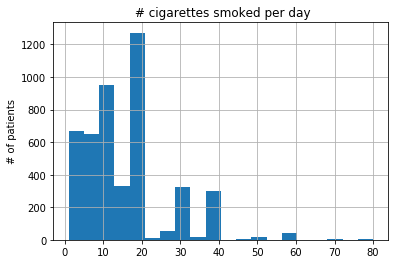

In [147]:
nh.hist_amount('HAR4S');

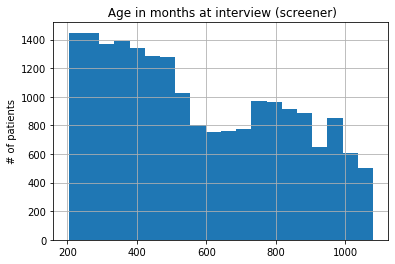

In [148]:
nh.hist_amount('HSAITMOR',outliers=1200);

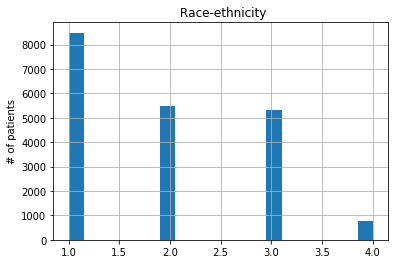

In [149]:
nh.hist_amount('DMARETHN', outliers=25);

In [150]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
210,Mother's weight calculated in pounds,HFC2S,1300,NaN,1
212,Father's weight calculated in pounds,HFC4S,1302,NaN,1
414,Doctor told control/lose weight for HBP,HAE4B,1601,NaN,1
424,Now controlling or losing weight for HBP,HAE5B,1611,NaN,1
435,Doctor told lose weight for HBC,HAE8B,1622,NaN,1
439,Now losing weight to lower cholesterol,HAE9B,1626,NaN,1
444,"On own for HBC, controlled/lost weight",HAE11B,1631,NaN,1
599,Difficulty lifting or carrying 10 pounds,HAH4,1807,NaN,1
705,Consider self over/under/right weight,HAM11,1964,NaN,1
707,Tried to lose weight in past 12 months,HAM13,1966,NaN,1


In [151]:
cols[cols.description.str.contains('stand') ]

,description,variable,position,end position,length
450,If stand still is chest pain relieved,HAF5,1637,NaN,1
466,Leg pain begin while stand still/sitting,HAF15,1658,NaN,1
472,Is leg pain relieved if you stand still,HAF21,1664,NaN,1
478,Problem with ability to speak/understand,HAF27,1670,NaN,1
604,Difficulty standing from armless chair,HAH9,1812,NaN,1


Test Markdown

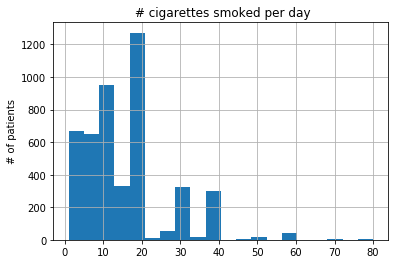

In [152]:
nh.hist_amount('HAR4S');

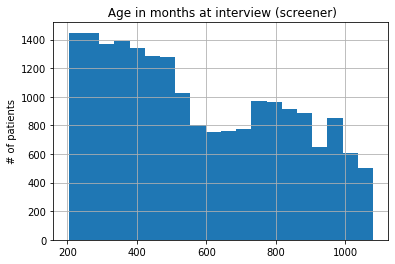

In [153]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

In [154]:
adult_final.head()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,...,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,...,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
52,2,2,2,2,2,2,2,2,2,2,...,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,...,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN
84,2,2,2,2,2,2,2,2,2,2,...,157.0,82.1,72.45,2,2.0,3.0,280.0,NaN,NaN,NaN


In [155]:
adult_final[adult_final.SPPFEV1==8888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,


In [156]:
adult_final[adult_final.SPPFEV3==88888]
# this shows rows with 88888 in SPPFEV3 - 45, 2518, 3216, 5167 etc
# Then want replace with NaN

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,


after running replace there are no longer FEV3 of 88888

In [157]:
adult_final['SPPFEV3'].isnull().sum()

0

In [158]:
adult_final[adult_final.SPPFEV3==88888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,


In [159]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
count,4862.0,4862.0,4862.000000,4862.0,4862.0,4862.000000,4862.000000,4862.00000,4862.000000,4862.0,...,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,0.0,0.0,0.0
mean,2.0,2.0,2.003702,2.0,2.0,2.001234,1.984574,2.00144,2.002468,2.0,...,165.738153,1273.982250,1535.388696,1.364459,2.036816,2.285068,455.326615,NaN,NaN,NaN
std,0.0,0.0,0.149010,0.0,0.0,0.086049,0.163436,0.10039,0.121679,0.0,...,9.718960,10199.764141,36027.659955,0.530140,0.822739,0.958606,204.662271,NaN,NaN,NaN
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.00000,2.000000,2.0,...,131.700000,69.700000,32.000000,1.000000,1.000000,1.000000,204.000000,NaN,NaN,NaN
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,...,158.600000,83.500000,60.750000,1.000000,1.000000,1.000000,287.250000,NaN,NaN,NaN
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,...,165.000000,86.600000,70.275000,1.000000,2.000000,3.000000,400.000000,NaN,NaN,NaN
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,...,172.400000,90.200000,82.200000,2.000000,3.000000,3.000000,576.000000,NaN,NaN,NaN
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.00000,8.000000,2.0,...,206.500000,88888.000000,888888.000000,8.000000,3.000000,3.000000,958.000000,NaN,NaN,NaN


In [ ]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

# change bad/blank data to NaN in adult_final then youth_final

from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  SPPFEF75 1832 with 8888
  HSAITMOR 10 with 9999
  
  mapping = {8888: np.nan)
  
  adult_final.update_where( 
      (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
  )
  
  Also need HSAITMOR_exam with 9999
  


In [161]:

(adult_final.update_where( (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (adult_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (adult_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (adult_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (adult_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (adult_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
.update_where( (adult_final['HSAITMOR'] == 9999), 'HSAITMOR',np.nan)
) 

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,...,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,...,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
52,2,2,2,2,2,2,2,2,2,2,...,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,...,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN
84,2,2,2,2,2,2,2,2,2,2,...,157.0,82.1,72.45,2,2.0,3.0,280.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53558,2,2,2,2,2,2,2,2,2,2,...,163.1,83.3,64.10,1,1.0,3.0,663.0,NaN,NaN,NaN
53567,2,2,2,2,2,2,2,2,2,2,...,158.7,84.4,74.55,1,3.0,1.0,432.0,NaN,NaN,NaN
53592,2,2,2,2,2,2,2,2,2,2,...,166.8,85.5,53.20,1,3.0,1.0,235.0,NaN,NaN,NaN


In [162]:
(youth_final.update_where( (youth_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (youth_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (youth_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (youth_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (youth_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (youth_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
.update_where( (youth_final['HSAITMOR'] == 9999), 'HSAITMOR',np.nan)
) 

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,...,166.9,87.0,47.50,1,1.0,3.0,196.0,NaN,NaN,NaN
16,2,2,1,16,2,1,3,1,NaN,NaN,...,167.6,89.2,62.65,1,3.0,1.0,198.0,NaN,NaN,NaN
20,2,2,2,10,2,1,1,3,NaN,NaN,...,148.0,75.5,36.15,1,1.0,3.0,127.0,NaN,NaN,NaN
30,2,2,2,11,2,1,3,1,NaN,NaN,...,156.0,88888.0,46.67,1,3.0,1.0,143.0,NaN,NaN,NaN
33,2,2,2,14,2,1,3,1,NaN,NaN,...,164.6,84.9,56.00,1,3.0,1.0,178.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53566,2,2,1,10,2,2,2,3,NaN,NaN,...,146.0,70.5,42.50,2,2.0,3.0,131.0,NaN,NaN,NaN
53576,2,2,2,10,2,2,2,3,NaN,NaN,...,146.6,74.6,38.80,2,2.0,3.0,129.0,NaN,NaN,NaN
53579,2,2,1,15,2,2,2,3,NaN,NaN,...,170.3,89.7,66.00,2,2.0,3.0,181.0,NaN,NaN,NaN


Determine how many NaN there are for each parameter;
There are 22 missing values in adult_final

In [163]:

# print ("youth rows cols ", youth_final.shape)
print ("Youth FEV3 ", youth_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", youth_final['SPPFEV6'].isnull().sum(),
       " FVC ", youth_final['SPPFVC'].isnull().sum(),
       " MMEF ", youth_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", youth_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", youth_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", youth_final['SPPFEV05'].isnull().sum())
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum()
      )

Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0
Adult FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0


prior to deleting null rows 
adult rows cols  (4925, 73)
Adult FEV3  22  FEV6  22  FVC  0  MMEF  22  EXPIR  5  FEF75  0  FEV05  22  FEV1  0
youth rows cols  (2780, 67)
Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0

Now remove the adult rows which have null values in FEV3 and see if that clears all the rest of NaN
When do that says is 4903, which is 22 less, but when print adult_final back to 4925

In [164]:
adult_final = adult_final.dropna(subset=['SPPFEV3'])

Need also drop those with HSAITMOR that are null

In [165]:
adult_final = adult_final.dropna(subset=['HSAITMOR'])

In [166]:
print ("adult rows cols ",adult_final.shape)
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum(),
       " HSAITMOR ", adult_final['HSAITMOR'].isnull().sum()
      )

adult rows cols  (4862, 66)
Adult FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0  HSAITMOR  0


In [167]:
youth_final.shape

(2779, 60)

Now change blank data (8888 or 88888) to NaN
for variables 
Example below creates new df wind2 from wind
mapping = {-9999.0: np.nan}
wind2 = (
    wind
    .find_replace(
        usgs_pr_id=mapping,
        p_tnum=mapping,
        p_cap=mapping,
        t_cap=mapping,
        t_hh=mapping,
        t_rd=mapping,
        t_rsa=mapping,
        t_ttlh=mapping,
    )
)
wind2.head()

Example below replaces data with nan
(
    wind.update_where(
        (wind['p_year'] < 1887) | (wind['p_year'] > 2018), 'p_year', np.nan
    )
    .update_where((wind['t_hh'] <= 0) | (wind['t_hh'] >= 1000), 't_hh', np.nan)
    .update_where((wind['xlong'] < -161.76) | (wind['xlong'] > -68.01), 'xlong', np.nan)
);
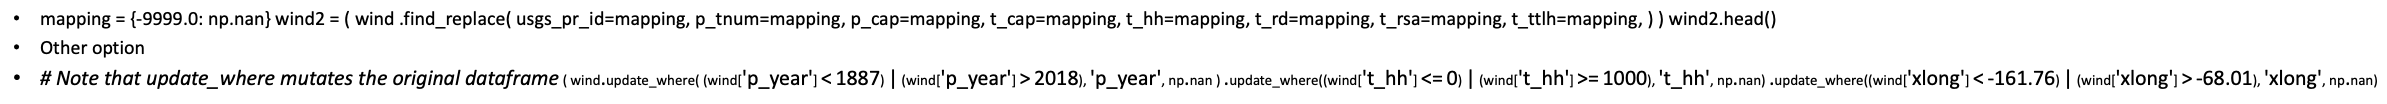

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [168]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [659]:
def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV3']= df.SPPFEV1 / df.SPPFEV6
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    df['MMEFOPEFR'] = df.SPPMMEF / df.SPPPEAK
    return
    

createvariables(adult_final) then youth_final

In [660]:
createvariables(adult_final)

In [661]:
createvariables(youth_final)

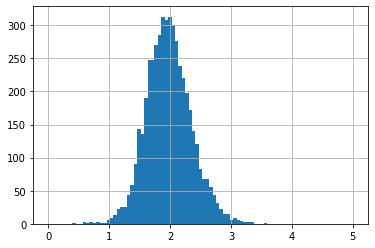

In [662]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

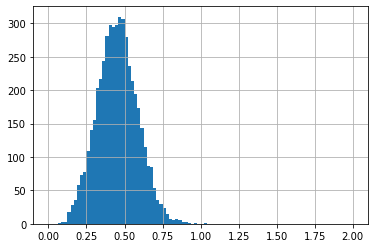

In [675]:
adult_final.MMEFOPEFR.hist(bins='auto', range=(0,2))

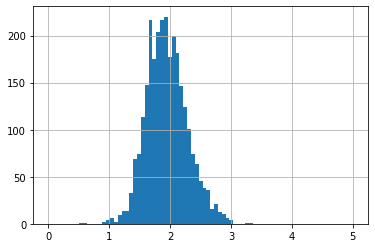

In [663]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

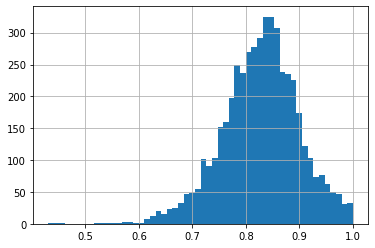

In [664]:
adult_final.FEV1OFVC.hist(bins='auto')

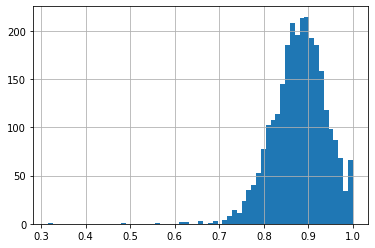

In [665]:
youth_final.FEV1OFVC.hist(bins='auto')

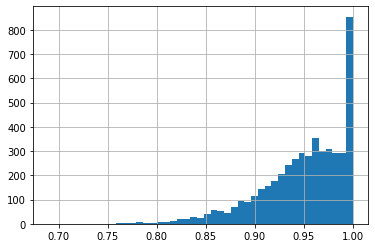

In [666]:
adult_final.FEV3OFVC.hist(bins='auto')

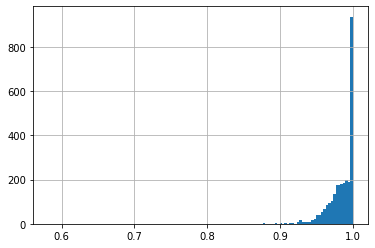

In [667]:
youth_final.FEV3OFVC.hist(bins='auto')

In [668]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,MXPAXTMR,HXPAXTMR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,MMEFOPEFR
count,4862.0,4862.0,4862.000000,4862.0,4862.0,4862.000000,4862.000000,4862.00000,4862.000000,4862.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.0,0.0,0.0,4862.000000,0.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,0.0,0.0,0.0,0.0,0.0,4862.000000,4862.0,0.0,0.0,0.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,0.0,0.0,0.0,0.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000
mean,2.0,2.0,2.003702,2.0,2.0,2.001234,1.984574,2.00144,2.002468,2.0,2.001234,2.009050,1.364459,2.036816,2.285068,1.621966,37.487659,2.0,NaN,NaN,455.326615,NaN,2.190045,2.188811,2.188194,2.046689,2.154258,5.572604,NaN,NaN,NaN,NaN,NaN,37.487659,2.0,NaN,NaN,NaN,1220.339572,6.191279,7564.297408,2530.530646,3195.569930,3677.613534,3800.220897,3866.856849,3411.545043,1267.889346,1.001234,3.862402,9.409914,23.468737,1.621966,9721.023015,456.238379,165.738153,1273.982250,1535.388696,1.364459,2.036816,2.285068,455.326615,456.238379,NaN,NaN,NaN,NaN,0.826982,0.841502,0.841502,1.977613,2.014003,2.391900,0.949341,0.981869,0.452740
std,0.0,0.0,0.149010,0.0,0.0,0.086049,0.163436,0.10039,0.121679,0.0,0.086049,0.238973,0.530140,0.822739,0.958606,0.484946,17.058528,0.0,NaN,NaN,204.662271,NaN,1.050896,1.047589,1.047995,1.128305,1.069514,1.494684,NaN,NaN,NaN,NaN,NaN,17.058528,0.0,NaN,NaN,NaN,740.436365,1.599611,2137.847568,659.263244,868.765393,1005.941007,1020.707355,1022.833131,1295.513205,725.664929,0.060839,0.627647,3.816239,1.755513,0.484946,12954.672988,204.648203,9.718960,10199.764141,36027.659955,0.530140,0.822739,0.958606,204.662271,204.648203,NaN,NaN,NaN,NaN,0.072087,0.061560,0.061560,0.366605,0.369465,0.398979,0.043586,0.023978,0.131578
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.0,NaN,NaN,204.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,668.000000,342.000000,675.000000,925.000000,925.000000,926.000000,272.000000,50.000000,1.000000,1.000000,1.000000,14.000000,1.000000,225.930000,204.000000,131.700000,69.700000,32.000000,1.000000,1.000000,1.000000,204.000000,204.000000,NaN,NaN,NaN,NaN,0.430769,0.442043,0.442043,0.437173,0.437459,0.989630,0.689231,0.831153,0.074074
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.0,NaN,NaN,287.250000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,24.000000,2.0,NaN,NaN,NaN,1010.000000,5.000000,6108.750000,2093.000000,2599.250000,2973.000000,3088.250000,3160.250000,2511.000000,711.000000,1.000000,4.000000,7.000000,23.000000,1.000000,2109.710000,289.000000,158.600000,83.500000,60.750000,1.000000,1.000000,1.000000,287.250000,289.000000,NaN,NaN,NaN,NaN,0.783220,0.804005,0.804005,1.731139,1.762472,2.124038,0.925523,0.973108,0.362623
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,2.000000,3.000000,2.00000

In [669]:
adult_final.BMPHT.std()

9.718959605346555

In [670]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,MXPAXTMR,HXPAXTMR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,MMEFOPEFR
count,4862.0,4862.0,4862.000000,4862.0,4862.0,4862.000000,4862.000000,4862.00000,4862.000000,4862.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.0,0.0,0.0,4862.000000,0.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,0.0,0.0,0.0,0.0,0.0,4862.000000,4862.0,0.0,0.0,0.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,0.0,0.0,0.0,0.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000
mean,2.0,2.0,2.003702,2.0,2.0,2.001234,1.984574,2.00144,2.002468,2.0,2.001234,2.009050,1.364459,2.036816,2.285068,1.621966,37.487659,2.0,NaN,NaN,455.326615,NaN,2.190045,2.188811,2.188194,2.046689,2.154258,5.572604,NaN,NaN,NaN,NaN,NaN,37.487659,2.0,NaN,NaN,NaN,1220.339572,6.191279,7564.297408,2530.530646,3195.569930,3677.613534,3800.220897,3866.856849,3411.545043,1267.889346,1.001234,3.862402,9.409914,23.468737,1.621966,9721.023015,456.238379,165.738153,1273.982250,1535.388696,1.364459,2.036816,2.285068,455.326615,456.238379,NaN,NaN,NaN,NaN,0.826982,0.841502,0.841502,1.977613,2.014003,2.391900,0.949341,0.981869,0.452740
std,0.0,0.0,0.149010,0.0,0.0,0.086049,0.163436,0.10039,0.121679,0.0,0.086049,0.238973,0.530140,0.822739,0.958606,0.484946,17.058528,0.0,NaN,NaN,204.662271,NaN,1.050896,1.047589,1.047995,1.128305,1.069514,1.494684,NaN,NaN,NaN,NaN,NaN,17.058528,0.0,NaN,NaN,NaN,740.436365,1.599611,2137.847568,659.263244,868.765393,1005.941007,1020.707355,1022.833131,1295.513205,725.664929,0.060839,0.627647,3.816239,1.755513,0.484946,12954.672988,204.648203,9.718960,10199.764141,36027.659955,0.530140,0.822739,0.958606,204.662271,204.648203,NaN,NaN,NaN,NaN,0.072087,0.061560,0.061560,0.366605,0.369465,0.398979,0.043586,0.023978,0.131578
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.0,NaN,NaN,204.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,668.000000,342.000000,675.000000,925.000000,925.000000,926.000000,272.000000,50.000000,1.000000,1.000000,1.000000,14.000000,1.000000,225.930000,204.000000,131.700000,69.700000,32.000000,1.000000,1.000000,1.000000,204.000000,204.000000,NaN,NaN,NaN,NaN,0.430769,0.442043,0.442043,0.437173,0.437459,0.989630,0.689231,0.831153,0.074074
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.0,NaN,NaN,287.250000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,24.000000,2.0,NaN,NaN,NaN,1010.000000,5.000000,6108.750000,2093.000000,2599.250000,2973.000000,3088.250000,3160.250000,2511.000000,711.000000,1.000000,4.000000,7.000000,23.000000,1.000000,2109.710000,289.000000,158.600000,83.500000,60.750000,1.000000,1.000000,1.000000,287.250000,289.000000,NaN,NaN,NaN,NaN,0.783220,0.804005,0.804005,1.731139,1.762472,2.124038,0.925523,0.973108,0.362623
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,2.000000,3.000000,2.00000

In [671]:
print (adult_final.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam'
 'MXPAXTMR' 'HXPAXTMR_exam' 'HXPG1' 'HXPG2A' 'HXPG2B' 'FEV1OFVC'
 'FEV1OFEV3' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6' 'PEFROFEV1' 'FEV3OFVC'
 'FEV6OFVC' 'MMEFOPEFR']


In [672]:
print (youth_final.columns.values)

['HYE1G' 'HYE1H' 'HSSEX' 'HSAGEIR' 'HSAGEU' 'DMARACER' 'DMARETHN'
 'DMAETHNR' 'HXPAXTMR' 'HXPSESSR' 'HYG2' 'HYG4' 'HYG7' 'HYG8' 'HYG12'
 'HSAITMOR' 'SPPQ1' 'SPPQ2' 'SPPQ3' 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1'
 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B' 'HSAGEIR_exam' 'HSAGEU_exam'
 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2' 'SPPTECH1' 'SPPTRIAL'
 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6' 'SPPFVC' 'SPPMMEF'
 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR' 'SPPTEMP'
 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC' 'FEV1OFEV3' 'MMEFOPEFR']


In [673]:
youth_final.describe()

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,HYG2,HYG4,HYG7,HYG8,HYG12,HSAITMOR,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,FEV1OFEV3,MMEFOPEFR
count,2779.0,2779.0,2779.000000,2779.000000,2779.0,2779.000000,2779.000000,2779.000000,0.0,0.0,1268.000000,1268.000000,292.000000,2779.0,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,364.000000,363.0,2779.0,2779.000000,2779.000000,2779.0,0.0,0.0,0.0,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,0.0,0.0,0.0,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000
mean,2.0,2.0,1.520331,11.549478,2.0,1.423174,2.097877,2.274559,NaN,NaN,2.033123,2.033123,26.976027,2.0,2.002159,144.059374,2.179201,2.179201,2.177762,1.966535,2.137100,6.225261,1.874415,2.035714,0.0,0.0,0.001799,11.549478,2.0,NaN,NaN,NaN,1203.910759,6.730838,5395.127384,1922.562433,2465.397625,2765.670025,2801.377114,2809.475711,2929.051098,1328.233537,1.005398,3.860741,6.503059,23.366679,1.520331,7168.467416,144.969773,150.412990,1131.901116,11561.221555,1.423174,2.097877,2.274559,144.059374,NaN,NaN,NaN,0.879639,0.882193,1.946054,1.951705,2.207533,0.983933,0.996959,0.882193,0.545271
std,0.0,0.0,0.499676,2.485519,0.0,0.540760,0.786261,0.961743,NaN,NaN,0.444744,0.444744,147.234050,0.0,0.113817,29.997847,1.021503,1.021503,1.022459,1.134556,1.048288,1.754659,0.380959,0.482577,0.0,0.0,0.050165,2.485519,0.0,NaN,NaN,NaN,735.215924,1.805386,1724.882277,587.375293,782.607503,885.518907,892.039170,892.893113,1069.445510,625.266840,0.127160,0.631290,2.598577,1.511101,0.499676,9895.484513,30.031070,14.270978,9621.932221,100525.881670,0.540760,0.786261,0.961743,29.997847,NaN,NaN,NaN,0.059759,0.058186,0.335535,0.335106,0.318400,0.019409,0.007507,0.058186,0.109562
min,2.0,2.0,1.000000,8.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,2.000000,2.000000,1.000000,2.0,2.000000,96.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.0,0.0,0.000000,8.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,723.000000,334.000000,468.000000,734.000000,734.000000,736.000000,144.000000,77.000000,1.000000,1.000000,1.000000,16.000000,1.000000,214.250000,96.000000,115.000000,58.200000,18.250000,1.000000,1.000000,1.000000,96.000000,NaN,NaN,NaN,0.316216,0.413063,0.516216,0.583065,1.172145,0.581757,0.765541,0.413063,0.188482
25%,2.0,2.0,1.000000,9.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,2.000000,2.000000,1.000000,2.0,2.000000,119.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,0.0,0.0,0.000000,9.000000,2.0,NaN,NaN,NaN,1008.000000,5.000000,4106.500000,1473.000000,1862.500000,2095.000000,2120.000000,2128.000000,2147.000000,864.000000,1.000000,4.000000,5.000000,22.000000,1.000000,1701.355000,120.000000,138.900000,71.300000,33.750000,1.000000,1.000000,1.000000,119.000000,NaN,NaN,NaN,0.843070,0.846564,1.705818,1.712794,1.988411,0.975536,0.997784,0.846564,0.466893
50%,2.0,2.0,2.000000,11.000000,2.0,1.000000,2.000000,3.000000,NaN,NaN,2.000000,2.000000,2.000000,2.0,2.000000,140.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,0.0,0.0,0.000000,11.000000,2.0,NaN,NaN,NaN,1013.000000,6.000000,5095.000000,1820.000000,2331.000000,2615.000000,2653.000000,2660.000000,2752.000000,1201.000000,1.000000,4.000000,7.000000,23.

# Created other data bases to analyze

# adult m20overb m20overcma f18overb f18overcma

male 20 over. female 18 over; and cma (Caucasian-Mexican American) or b (black)
NOT NEED m20over = adult_final.query('HSAGEIR >=20 & HSSEX == 1’)
NOT NEED f18over = adult_final.query('HSAGEIR >=18 & HSSEX == 2’)
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other


In [184]:
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

In [185]:
f18overb.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,931.0,931.0,931.000000,931.0,931.0,931.0,931.000000,931.0,931.000000,931.0,...,0.0,0.0,0.0,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,2.0,2.0,2.006445,2.0,2.0,2.0,1.978518,2.0,2.006445,2.0,...,NaN,NaN,NaN,0.839950,0.852975,2.127018,2.161074,2.532122,0.952976,0.983941
std,0.0,0.0,0.196642,0.0,0.0,0.0,0.145063,0.0,0.196642,0.0,...,NaN,NaN,NaN,0.070939,0.060980,0.393889,0.394258,0.422870,0.042319,0.022984
min,2.0,2.0,2.000000,2.0,2.0,2.0,1.000000,2.0,2.000000,2.0,...,NaN,NaN,NaN,0.539349,0.563698,0.814485,0.843137,1.252341,0.763021,0.831153
25%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,NaN,NaN,NaN,0.796559,0.816724,1.880943,1.913823,2.247369,0.929227,0.975634
50%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,NaN,NaN,NaN,0.843328,0.855270,2.124096,2.154800,2.511392,0.960784,0.994400
75%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,NaN,NaN,NaN,0.887111,0.891550,2.357952,2.393379,2.794323,0.987893,0.999415
max,2.0,2.0,8.000000,2.0,2.0,2.0,2.000000,2.0,8.000000,2.0,...,NaN,NaN,NaN,1.000000,1.000000,3.583281,3.588963,4.029915,1.000000,1.000000


## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

male<20,female<18
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [186]:
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [187]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

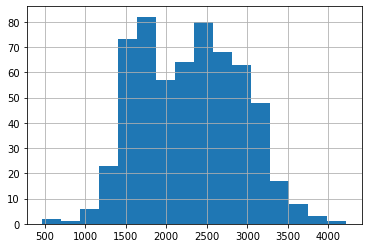

In [188]:
flt18b.SPPFEV1.hist(bins='auto')

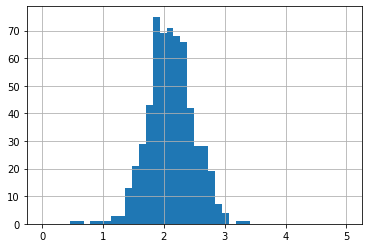

In [189]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

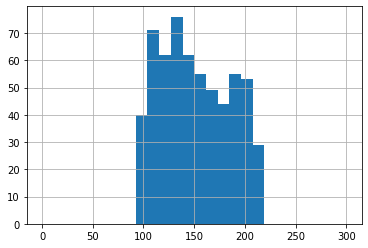

In [190]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

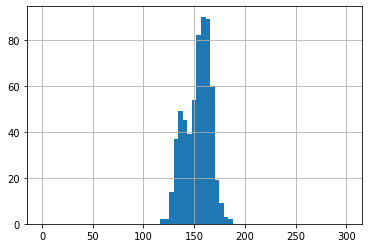

In [191]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

## Frames to Analyze

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [192]:
framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [193]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20overma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [194]:
varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [195]:
print (varsnonratio[0])

SPPFEV1


## Variables ratio

varsratio = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

In [196]:
varsratio= ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [197]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [198]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

In [199]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [200]:
for x in varsratio:
    print (x)

FEV1OFVC
FEV1OFEV6
PEFROFVC
PEFROFEV6
PEFROFEV1
FEV3OFVC
FEV6OFVC


## For all frames, for all ratios to analyze, do regression vs age & save in resultsratioand index dfnvarn

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

In [201]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count
m20overbFEV1OFVC , m20overb , FEV1OFVC , 0.8924284378190949 , -0.001873463788250874 , 0.1383196032725328 , 0.07069460939688403 , 473
m20overbFEV1OFEV6 , m20overb , FEV1OFEV6 , 0.8846808242022477 , -0.001271386051362786 , 0.0803707754088151 , 0.06293775197568191 , 473
m20overbPEFROFVC , m20overb , PEFROFVC , 2.145305251218833 , -0.0006004066718230318 , 0.00048552778267052515 , 0.3824030345903154 , 473
m20overbPEFROFEV6 , m20overb , PEFROFEV6 , 2.122888064789476 , 0.0010301409436608332 , 0.0014292262185064963 , 0.38240981022772125 , 473
m20overbPEFROFEV1 , m20overb , PEFROFEV1 , 2.3875880943499768 , 0.005011649673591213 , 0.033565150451984604 , 0.3839010230669332 , 473
m20overbFEV3OFVC , m20overb , FEV3OFVC , 1.

# regression for non-ratios height_age_reg(data, y_var)

In [202]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAITMOR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [203]:
for x in varsnonratio:
    print (x)

SPPFEV1
SPPFEV3
SPPFEV6
SPPFVC
SPPPEAK
SPPMMEF
SPPFEF75
SPPEXPIR


# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

In [204]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',intercept, ',',b1, ',',b2, ',',b3, ',',r2, ',',std, ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
m20overbSPPFEV1 , m20overb , SPPFEV1 , 767.0236994639968 , -23.84610364694074 , -0.015753441243156627 , 0.11931883926674018 , 0.4602481803319741 , 711.1235423144125 , 473
m20overbSPPFEV3 , m20overb , SPPFEV3 , 607.7892614597035 , -30.339723349163158 , 0.04120457113578995 , 0.1467571369242265 , 0.48500268366278243 , 782.8387910244661 , 473
m20overbSPPFEV6 , m20overb , SPPFEV6 , 385.142524884026 , -25.43506603529646 , 0.014554514400975068 , 0.1541581116196724 , 0.45762948874425347 , 788.2261372626547 , 473
m20overbSPPFVC , m20overb , SPPFVC , 134.40876360520815 , -19.7511396580624 , -0.016987736977056633 , 0.1595334742714603 , 0.4276361997449539 , 790.2239236048331 , 

## ****** Now percent predicted - create variables for ratios first

In [205]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

For all dataframes, create ppvar values (shows caveat but works)

In [206]:
for y in framestoanalyze:
    createvarspp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [207]:
def createvarsPred(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1Pred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))


In [208]:
for y in framestoanalyze:
    createvarsPred(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [209]:
print (m20overb.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC' 'FEV1OFVCPP' 'PEFROFVCPP' 'FEV1OFEV6PP'
 'PEFROFEV6PP' 'PEFROFEV1PP' 'FEV3OFVCPP' 'FEV6OFVCPP' 'FEV1OFVCPred'
 'PEFROFVCPred' 'FEV1OFEV6Pred' 'PEFROFEV6Pred' 'PEFROFEV1Pred'
 'FEV3OFVCPred' 'FEV6OFVCPred']


Check can refer to resultsratio value

In [210]:
print(resultsratio)

                     dfname        var  intercept     slope        r2  \
dfnvarn                                                                 
m20overbFEV1OFVC   m20overb   FEV1OFVC   0.892428 -0.001873  0.138320   
m20overbFEV1OFEV6  m20overb  FEV1OFEV6   0.884681 -0.001271  0.080371   
m20overbPEFROFVC   m20overb   PEFROFVC   2.145305 -0.000600  0.000486   
m20overbPEFROFEV6  m20overb  PEFROFEV6   2.122888  0.001030  0.001429   
m20overbPEFROFEV1  m20overb  PEFROFEV1   2.387588  0.005012  0.033565   
...                     ...        ...        ...       ...       ...   
fallmaPEFROFVC       fallma   PEFROFVC   1.907140  0.000201  0.000104   
fallmaPEFROFEV6      fallma  PEFROFEV6   1.886835  0.001708  0.007315   
fallmaPEFROFEV1      fallma  PEFROFEV1   2.042206  0.006528  0.093522   
fallmaFEV3OFVC       fallma   FEV3OFVC   1.011251 -0.001610  0.544116   
fallmaFEV6OFVC       fallma   FEV6OFVC   1.010072 -0.000759  0.453175   

                        std count  
dfnvarn       

In [211]:
vn = 'm20overbFEV1OFVC'
print(resultsratio.loc[vn, 'intercept'] )

0.8924284378190949


In [212]:
print(resultsnonratio)

                   dfname       var    intercept         b1        b2  \
dfnvarn                                                                 
m20overbSPPFEV1  m20overb   SPPFEV1   767.023699 -23.846104 -0.015753   
m20overbSPPFEV3  m20overb   SPPFEV3   607.789261 -30.339723  0.041205   
m20overbSPPFEV6  m20overb   SPPFEV6   385.142525 -25.435066  0.014555   
m20overbSPPFVC   m20overb    SPPFVC   134.408764 -19.751140 -0.016988   
m20overbSPPPEAK  m20overb   SPPPEAK  1193.481939   4.341878 -0.572220   
...                   ...       ...          ...        ...       ...   
fallmaSPPFVC       fallma    SPPFVC -1293.506099  39.232794 -0.608607   
fallmaSPPPEAK      fallma   SPPPEAK -1491.345703  91.016756 -1.331420   
fallmaSPPMMEF      fallma   SPPMMEF  -431.056237  30.261308 -0.749020   
fallmaSPPFEF75     fallma  SPPFEF75  -319.726620 -19.732476 -0.030801   
fallmaSPPEXPIR     fallma  SPPEXPIR     4.539717   0.161023 -0.000733   

                       b3        r2          std c

In [213]:
vn = 'm20overbSPPFEV1'
print(resultsnonratio.loc[vn, 'intercept'] )

767.0236994639968


Now create PP Nonratio PP  FEV1PP, PEFRPP, FVCPP, FEV3PP, FEV6PP, MMEFPP, FEF75PP, EXPIRPP  from resultsnonratio

In [214]:
resultsnonratio  # sometimes has not set dfnvarn as target

,dfname,var,intercept,b1,b2,b3,r2,std,count
dfnvarn,,,,,,,,,
m20overbSPPFEV1,m20overb,SPPFEV1,767.023699,-23.846104,-0.015753,0.119319,0.460248,711.123542,473
m20overbSPPFEV3,m20overb,SPPFEV3,607.789261,-30.339723,0.041205,0.146757,0.485003,782.838791,473
m20overbSPPFEV6,m20overb,SPPFEV6,385.142525,-25.435066,0.014555,0.154158,0.457629,788.226137,473
m20overbSPPFVC,m20overb,SPPFVC,134.408764,-19.751140,-0.016988,0.159533,0.427636,790.223924,473
m20overbSPPPEAK,m20overb,SPPPEAK,1193.481939,4.341878,-0.572220,0.279859,0.249727,2022.551274,473
...,...,...,...,...,...,...,...,...,...
fallmaSPPFVC,fallma,SPPFVC,-1293.506099,39.232794,-0.608607,0.169436,0.685140,702.977592,1551
fallmaSPPPEAK,fallma,SPPPEAK,-1491.345703,91.016756,-1.331420,0.268988,0.456763,1498.999387,1551
fallmaSPPMMEF,fallma,SPPMMEF,-431.056237,30.261308,-0.749020,0.151149,0.419568,1020.303977,1551


In [215]:
resultsnonratio

,dfname,var,intercept,b1,b2,b3,r2,std,count
dfnvarn,,,,,,,,,
m20overbSPPFEV1,m20overb,SPPFEV1,767.023699,-23.846104,-0.015753,0.119319,0.460248,711.123542,473
m20overbSPPFEV3,m20overb,SPPFEV3,607.789261,-30.339723,0.041205,0.146757,0.485003,782.838791,473
m20overbSPPFEV6,m20overb,SPPFEV6,385.142525,-25.435066,0.014555,0.154158,0.457629,788.226137,473
m20overbSPPFVC,m20overb,SPPFVC,134.408764,-19.751140,-0.016988,0.159533,0.427636,790.223924,473
m20overbSPPPEAK,m20overb,SPPPEAK,1193.481939,4.341878,-0.572220,0.279859,0.249727,2022.551274,473
...,...,...,...,...,...,...,...,...,...
fallmaSPPFVC,fallma,SPPFVC,-1293.506099,39.232794,-0.608607,0.169436,0.685140,702.977592,1551
fallmaSPPPEAK,fallma,SPPPEAK,-1491.345703,91.016756,-1.331420,0.268988,0.456763,1498.999387,1551
fallmaSPPMMEF,fallma,SPPMMEF,-431.056237,30.261308,-0.749020,0.151149,0.419568,1020.303977,1551


In [216]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'SPPFEV1'
    print (vn)
    df['FEV1PP'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPP'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPP'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3PP'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6PP'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPP'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75PP'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPP'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

Create predFVCmFEV6

In [217]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratioPred(df):
    vn = df.name + 'SPPFEV1'
    df['FEV1Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPred'] =  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3Pred'] =  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [218]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarpredFVCmFEV6(df):
        vn = df.name + 'SPPFVC'
        vnb = df.name + 'SPPFEV6'
        df['predFVCmFEV6'] = (resultsnonratio.loc[vn, 'intercept'] 
                          + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                          + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                          + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT ) 
        - (resultsnonratio.loc[vnb, 'intercept'] 
                          + resultsnonratio.loc[vnb, 'b1'] * (df.HSAITMOR_exam / 12)  
                          + resultsnonratio.loc[vnb, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                          + resultsnonratio.loc[vnb, 'b3']* df.BMPHT * df.BMPHT )
    


In [219]:
resultsnonratio.describe()

,intercept,b1,b2,b3,r2,std
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,-405.893792,8.436084,0.723634,0.134152,0.571576,912.321632
std,1317.670004,137.509680,5.403808,0.075893,0.233175,551.374767
min,-4558.302101,-385.640006,-22.087885,-0.000102,0.003562,2.468127
25%,-1161.419395,-21.891099,-0.682746,0.085459,0.421004,651.724111
50%,-184.341673,0.386937,-0.219507,0.143936,0.593441,784.316559
75%,67.651354,46.494246,0.009389,0.175824,0.768329,1225.043265
max,3201.807909,727.708714,23.237972,0.345222,0.918820,2723.737287


For all dataframes create varsnonratiopp and varsnonratioPred

In [220]:
for y in framestoanalyze:
    print(y.name)
    createvarsnonratiopp(y)
    createvarsnonratioPred(y)
    

m20overb
m20overbSPPFEV1
m20overcma
m20overcmaSPPFEV1
m20overc
m20overcSPPFEV1
m20overma
m20overmaSPPFEV1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

f18overb
f18overbSPPFEV1
f18overcma
f18overcmaSPPFEV1
f18overc
f18overcSPPFEV1
f18overma
f18overmaSPPFEV1
mlt20b
mlt20bSPPFEV1
mlt20cma
mlt20cmaSPPFEV1
mlt20c
mlt20cSPPFEV1
mlt20ma
mlt20maSPPFEV1
flt18b
flt18bSPPFEV1
flt18cma
flt18cmaSPPFEV1
flt18c
flt18cSPPFEV1
flt18ma
flt18maSPPFEV1
mallcma
mallcmaSPPFEV1
mallb
mallbSPPFEV1
mallc
mallcSPPFEV1
mallma
mallmaSPPFEV1
fallcma
fallcmaSPPFEV1
fallb
fallbSPPFEV1
fallc
fallcSPPFEV1
fallma
fallmaSPPFEV1


In [221]:
for y in framestoanalyze:
 #   print(y.name)
    createvarpredFVCmFEV6(y)
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


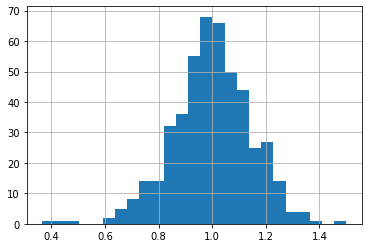

In [222]:
m20overb.FEV1PP.hist(bins='auto')

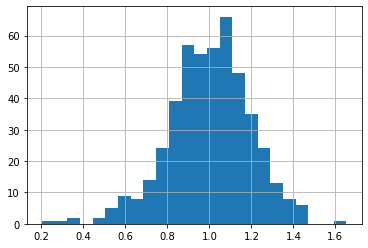

In [223]:
m20overb.PEFRPP.hist(bins='auto')

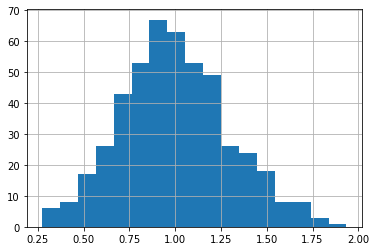

In [224]:
m20overb.MMEFPP.hist(bins='auto')

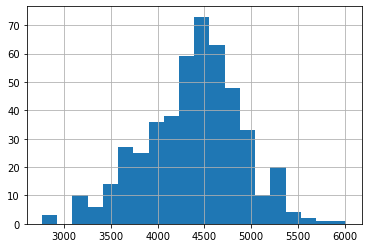

In [225]:
m20overb.predFVCmFEV6.hist(bins='auto')

In [226]:
m20overb.MMEFPP.describe()

count    473.000000
mean       1.000379
std        0.296005
min        0.272278
25%        0.800432
50%        0.979553
75%        1.187213
max        1.934916
Name: MMEFPP, dtype: float64

In [227]:
pd.set_option('display.max_columns', 999)

In [228]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1OFVCPred,PEFROFVCPred,FEV1OFEV6Pred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFVCPred,FEV6OFVCPred,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Has many values as 88888 for SPPTIME, and 8888.0 SPPFEF75 AND SPPFEV05, 88888.0 for SPPMMEF, SPPFEV3, SPPFEV05, SPPFEV6
  from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  so need replace those in adult and youth files

So when doing analysis need ignore values of 8888

In [229]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1OFVCPred,PEFROFVCPred,FEV1OFEV6Pred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFVCPred,FEV6OFVCPred,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Now create variables that depend on PP - PEFRPPOFVCPP, and PEFRPPOFEV1PP, 
then regression vs age in resultsppvars in form dfvartnam, bo, b1
then new value %pred
then 

create PEFRpp/FEV1pp and PEFRpp/FVCpp for all dataframes

In [230]:
def createvariablespp(df):
    df['PEFRPPOFEV1PP'] = df.PEFRPP / df.FEV1PP
    df['PEFRPPOFVCPP']= df.PEFRPP/ df.FVCPP
    return

In [231]:
for y in framestoanalyze:
    createvariablespp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


linear regression of PEFRpp/FEV1pp and PEFRpp/FVCpp vs age into resultsratiopp; for all dataframes

In [232]:
varsratiopp= ['PEFRPPOFEV1PP', 'PEFRPPOFVCPP']

# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [233]:
# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count
m20overbPEFRPPOFEV1PP , m20overb , PEFRPPOFEV1PP , 1.0112870914851018 , -0.0002991860706395251 , 0.0008409902490008614 , 0.14478672784948757 , 473
m20overbPEFRPPOFVCPP , m20overb , PEFRPPOFVCPP , 1.010692916270139 , -0.0001225547490134862 , 9.118717343226113e-05 , 0.18011344432866233 , 473
m20overcmaPEFRPPOFEV1PP , m20overcma , PEFRPPOFEV1PP , 1.0036716324992623 , -3.337101763811714e-05 , 1.5876396535663417e-05 , 0.13451256686511234 , 1075
m20overcmaPEFRPPOFVCPP , m20overcma , PEFRPPOFVCPP , 1.006666357323693 , -2.2187191466274943e-05 , 4.809356296209267e-06 , 0.1624905966693641 , 1075
m20overcPEFRPPOFEV1PP , m20overc , PEFRPPOFEV1PP , 1.0019128770293142 , 2.138346323085583e-05 , 9.540369855565167e-06 , 0.118739213508

In [234]:
for y in framestoanalyze:
    createvariablespp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


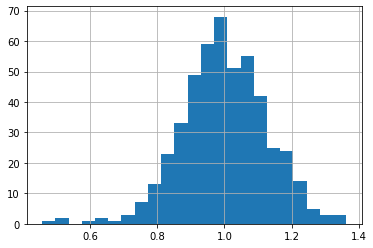

In [235]:
m20overc.FEV1PP.hist(bins='auto')

Createvarsppopp for PEFRPPOFVCPPPP and PEFRPPOFVCPPPP

In [236]:
def createvarsppopp(df):
    vn = df.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPP'] = df.PEFRPPOFVCPP / (resultsratio.loc[vn, 'intercept'] 
                                              + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPP'] = df.PEFRPPOFEV1PP / (resultsratio.loc[vn, 'intercept'] 
                                                + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    

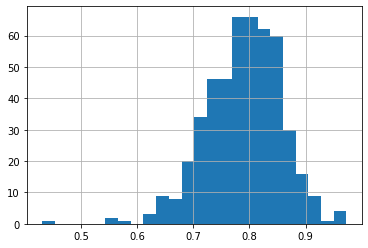

In [237]:
m20overc.FEV1OFVC.hist(bins='auto')

In [238]:
for y in framestoanalyze:
    createvarsppopp

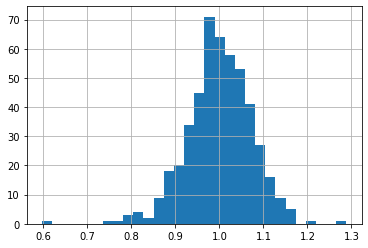

In [239]:
m20overc.FEV1OFVCPP.hist(bins='auto')

In [240]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

0.7895631761854932 0.08593317552024858 0.14136007373080892 0.6482031024546843
0.6916573423384921


says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [241]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

0.9999897226061009 0.07460588093559016 0.12272667413904581 0.877263048467055


says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

Try saving variables to array

In [242]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

m20overc
FEV1OFEV6
m20overcFEV1OFEV6


In [243]:
print (resultsratio)

                     dfname        var  intercept     slope        r2  \
dfnvarn                                                                 
m20overbFEV1OFVC   m20overb   FEV1OFVC   0.892428 -0.001873  0.138320   
m20overbFEV1OFEV6  m20overb  FEV1OFEV6   0.884681 -0.001271  0.080371   
m20overbPEFROFVC   m20overb   PEFROFVC   2.145305 -0.000600  0.000486   
m20overbPEFROFEV6  m20overb  PEFROFEV6   2.122888  0.001030  0.001429   
m20overbPEFROFEV1  m20overb  PEFROFEV1   2.387588  0.005012  0.033565   
...                     ...        ...        ...       ...       ...   
fallmaPEFROFVC       fallma   PEFROFVC   1.907140  0.000201  0.000104   
fallmaPEFROFEV6      fallma  PEFROFEV6   1.886835  0.001708  0.007315   
fallmaPEFROFEV1      fallma  PEFROFEV1   2.042206  0.006528  0.093522   
fallmaFEV3OFVC       fallma   FEV3OFVC   1.011251 -0.001610  0.544116   
fallmaFEV6OFVC       fallma   FEV6OFVC   1.010072 -0.000759  0.453175   

                        std count  
dfnvarn       

new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [244]:
height_age_reg(m20overb, 'SPPFEV1')

('m20overb',
 'SPPFEV1',
 767.0236994639968,
 array([-2.38461036e+01, -1.57534412e-02,  1.19318839e-01]),
 0.4602481803319741,
 711.1235423144125,
 473)

## now need do the same using Hankinson equations
Hvarlistnonratio - FEV1, FVC, FEV6, MMEF, PEF
Hvarlistratio - FEV1OFEV6, FEV1OFVC
need first enter Hresults into hresultsratio names intercept, slope 
  H has same equation for youth and adults for ratios
and Hresults into hresultsnonratio with names intercept, b1, b2
Can read from excel or csv file - data = pd.read_csv("filename.csv"); then data.head() to look at first five lines
then createvarsratiopph and createvarsnonratiopph for each in hvarlistratio and hvarlistnonratio
then creatediffsppratio and creatediffsppnonratio for each in hvarlistratio and hvarlistnonratio
the show mean and std of each variable

In [245]:
hvarlistnonratio = [ 'SPPFEV1', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF']

In [246]:
hvarlistratio = ['SPPFEV1OFVC','SPPFEV1OFEV6']

## Create dataframes hresultsratio hresultsnonratio from the csv files

In [247]:
import os

In [248]:
os.getcwd()

'/Users/doug/Documents/nhanes'

In [249]:
os.listdir(os.getcwd())

['.DS_Store',
 'nhanes.doug.ipynb',
 'NHANES analysis',
 'nhanes',
 'nhanes.doug-Copy1.ipynb',
 '__pycache__',
 'nhanes_loader.py',
 'nhanes.ipynb',
 '.gitignore',
 'master',
 '.ipynb_checkpoints',
 '.git',
 'data']

In [250]:
hresultsratio = pd.read_csv("data/hankinson_ratio.csv")
hresultsratio.set_index('dfnvarn', inplace=True)
print (hresultsratio)

                        dfname        var  intercept   slope  llnintercept  \
dfnvarn                                                                      
m20overbFEV1OFEV6     m20overb  FEV1OFEV6     88.841 -0.1305        78.979   
m20overbFEV1OFVC      m20overb   FEV1OFVC     89.239 -0.1828        78.822   
m20overcFEV1OFEV6     m20overc  FEV1OFEV6     87.340 -0.1382        78.372   
m20overcFEV1OFVC      m20overc   FEV1OFVC     88.066 -0.2066        78.388   
m20overmaFEV1OFEV6   m20overma  FEV1OFEV6     89.388 -0.1534        80.810   
m20overmaFEV1OFVC    m20overma   FEV1OFVC     90.024 -0.2186        80.925   
f18overbFEV1OFEV6     f18overb  FEV1OFEV6     91.229 -0.1558        81.396   
f18overbFEV1OFVC      f18overb   FEV1OFVC     91.655 -0.2039        80.978   
f18overcFEV1OFEV6     f18overc  FEV1OFEV6     90.107 -0.1563        81.307   
f18overcFEV1OFVC      f18overc   FEV1OFVC     90.809 -0.2125        81.015   
f18overmaFEV1OFEV6   f18overma  FEV1OFEV6     91.664 -0.1670    

In [251]:
hresultsratio.head()

,dfname,var,intercept,slope,llnintercept,r2
dfnvarn,,,,,,
m20overbFEV1OFEV6,m20overb,FEV1OFEV6,88.841,-0.1305,78.979,0.0937
m20overbFEV1OFVC,m20overb,FEV1OFVC,89.239,-0.1828,78.822,0.1538
m20overcFEV1OFEV6,m20overc,FEV1OFEV6,87.340,-0.1382,78.372,0.2151
m20overcFEV1OFVC,m20overc,FEV1OFVC,88.066,-0.2066,78.388,0.3448
m20overmaFEV1OFEV6,m20overma,FEV1OFEV6,89.388,-0.1534,80.810,0.1711


In [252]:
hresultsnonratio = pd.read_csv("data/hankinson_nonratio.csv")
hresultsnonratio.set_index('dfnvarn', inplace=True)
print (hresultsnonratio)

                  dfname   var  intercept       b1        b2        b3  \
dfnvarn                                                                  
mlt20cFEV1        mlt20c  FEV1    -0.7453 -0.04106  0.004477  0.000141   
mlt20cFEV6        mlt20c  FEV6    -0.3119 -0.18612  0.009717  0.000182   
mlt20cFVC         mlt20c   FVC    -0.2584 -0.20415  0.010133  0.000186   
mlt20cPEF         mlt20c   PEF    -0.5962 -0.12357  0.013135  0.000250   
mlt20cMMEF        mlt20c  MMEF    -1.0863  0.13939  0.000000  0.000103   
m20overcFEV1    m20overc  FEV1     0.5536 -0.01303 -0.000172  0.000141   
m20overcFEV6    m20overc  FEV6     0.1102 -0.00842 -0.000223  0.000182   
m20overcFVC     m20overc   FVC    -0.1933  0.00064 -0.000269  0.000186   
m20overcPEF     m20overc   PEF     1.0523  0.08272 -0.001301  0.000250   
m20overcMMEF    m20overc  MMEF     2.7006 -0.04995  0.000000  0.000103   
mlt20bFEV1        mlt20b  FEV1    -0.7048 -0.05711  0.004316  0.000132   
mlt20bFEV6        mlt20b  FEV6    -0.5

In [253]:
hresultsnonratio.head()

,dfname,var,intercept,b1,b2,b3,llnb3,r2
dfnvarn,,,,,,,,
mlt20cFEV1,mlt20c,FEV1,-0.7453,-0.04106,0.004477,0.000141,0.000116,0.8510
mlt20cFEV6,mlt20c,FEV6,-0.3119,-0.18612,0.009717,0.000182,0.000153,0.8692
mlt20cFVC,mlt20c,FVC,-0.2584,-0.20415,0.010133,0.000186,0.000157,0.8668
mlt20cPEF,mlt20c,PEF,-0.5962,-0.12357,0.013135,0.000250,0.000176,0.7808
mlt20cMMEF,mlt20c,MMEF,-1.0863,0.13939,0.000000,0.000103,0.000053,0.5601


The Hankinson ratio are 1/100 as big, to need multiply by 100 (need double check)

In [254]:
def createvarsratiopph(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCPPh'] = (df.FEV1OFVC / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR/ 12)))*100
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPh']= (df.FEV1OFEV6 / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR / 12)))*100
    

In [255]:
def createvarsratiollnPredh(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCLLNPredh'] = (hresultsratio.loc[vn, 'llnintercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR/ 12))*100
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6LLNPredh']= (hresultsratio.loc[vn, 'llnintercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR / 12))*100
    

change HSAITMOR_exam to HSAITMOR

In [256]:
def createvarsnonratiopph(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1PPh'] = df.SPPFEV1 / 1000/(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.HSAITMOR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                       + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPPh'] = df.SPPFVC / 1000 /(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFPPh'] = df.SPPPEAK /1000/ (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6PPh'] = df.SPPFEV6 /1000/ (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPPh'] = df.SPPMMEF / 1000/(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [257]:
def createvarsnonratioPredh(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1Predh'] = 1000*(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.HSAITMOR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                       + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPredh'] = 1000 *(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFPredh'] = 1000* (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6Predh'] = 1000* (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [258]:
def createvarsnonratiollnPredh(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1LLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.HSAITMOR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCLLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'llnb3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFLLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6LLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFLLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )


In [259]:
def createvarpredFVCmFEV6h(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FVC'
    vnb = df.name + 'FEV6'
    df['predFVCmFEV6h'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT ) 
    - (hresultsnonratio.loc[vnb, 'intercept'] 
                                      + hresultsnonratio.loc[vnb, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vnb, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                      + hresultsnonratio.loc[vnb, 'b3']* df.BMPHT * df.BMPHT )


In [260]:
hresultsratio.index

Index(['m20overbFEV1OFEV6', 'm20overbFEV1OFVC', 'm20overcFEV1OFEV6',
       'm20overcFEV1OFVC', 'm20overmaFEV1OFEV6', 'm20overmaFEV1OFVC',
       'f18overbFEV1OFEV6', 'f18overbFEV1OFVC', 'f18overcFEV1OFEV6',
       'f18overcFEV1OFVC', 'f18overmaFEV1OFEV6', 'f18overmaFEV1OFVC',
       'mlt20bFEV1OFEV6', 'mlt20bFEV1OFVC', 'mlt20cFEV1OFEV6',
       'mlt20cFEV1OFVC', 'mlt20maFEV1OFEV6', 'mlt20maFEV1OFVC',
       'flt18bFEV1OFEV6', 'flt18bFEV1OFVC', 'flt18cFEV1OFEV6',
       'flt18cFEV1OFVC', 'flt18maFEV1OFEV6', 'flt18maFEV1OFVC',
       'mallbFEV1OFEV6', 'mallbFEV1OFVC', 'mallcFEV1OFEV6', 'mallcFEV1OFVC',
       'mallmaFEV1OFEV6', 'mallmaFEV1OFVC', 'fallbFEV1OFEV6', 'fallbFEV1OFVC',
       'fallcFEV1OFEV6', 'fallcFEV1OFVC', 'fallmaFEV1OFEV6', 'fallmaFEV1OFVC'],
      dtype='object', name='dfnvarn')

In [261]:
hratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma, 
                    mallb, mallc, mallma,  fallb, fallc, fallma]

In [262]:
hnonratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma ]

In [263]:
hresultsnonratio.index

Index(['mlt20cFEV1', 'mlt20cFEV6', 'mlt20cFVC', 'mlt20cPEF', 'mlt20cMMEF',
       'm20overcFEV1', 'm20overcFEV6', 'm20overcFVC', 'm20overcPEF',
       'm20overcMMEF', 'mlt20bFEV1', 'mlt20bFEV6', 'mlt20bFVC', 'mlt20bPEF',
       'mlt20bMMEF', 'm20overbFEV1', 'm20overbFEV6', 'm20overbFVC',
       'm20overbPEF', 'm20overbMMEF', 'mlt20maFEV1', 'mlt20maFEV6',
       'mlt20maFVC', 'mlt20maPEF', 'mlt20maMMEF', 'm20overmaFEV1',
       'm20overmaFEV6', 'm20overmaFVC', 'm20overmaPEF', 'm20overmaMMEF',
       'flt18cFEV1', 'flt18cFEV6', 'flt18cFVC', 'flt18cPEF', 'flt18cMMEF',
       'f18overcFEV1', 'f18overcFEV6', 'f18overcFVC', 'f18overcPEF',
       'f18overcMMEF', 'flt18bFEV1', 'flt18bFEV6', 'flt18bFVC', 'flt18bPEF',
       'flt18bMMEF', 'f18overbFEV1', 'f18overbFEV6', 'f18overbFVC',
       'f18overbPEF', 'f18overbMMEF', 'flt18maFEV1', 'flt18maFEV6',
       'flt18maFVC', 'flt18maPEF', 'flt18maMMEF', 'f18overmaFEV1',
       'f18overmaFEV6', 'f18overmaFVC', 'f18overmaPEF', 'f18overmaMMEF'],
     

In [264]:
for y in hratioframestoanalyze:
#    print (y.name)
    createvarsratiopph(y)
 #   createvarpredFVCmFEV6h(y) # can't do pred for all
    createvarsratiollnPredh(y)

m20overbFEV1OFVC
m20overbFEV1OFVC
m20overcFEV1OFVC
m20overcFEV1OFVC
m20overmaFEV1OFVC
m20overmaFEV1OFVC
f18overbFEV1OFVC
f18overbFEV1OFVC
f18overcFEV1OFVC
f18overcFEV1OFVC
f18overmaFEV1OFVC
f18overmaFEV1OFVC
mlt20bFEV1OFVC
mlt20bFEV1OFVC
mlt20cFEV1OFVC
mlt20cFEV1OFVC
mlt20maFEV1OFVC
mlt20maFEV1OFVC
flt18bFEV1OFVC
flt18bFEV1OFVC
flt18cFEV1OFVC
flt18cFEV1OFVC
flt18maFEV1OFVC
flt18maFEV1OFVC
mallbFEV1OFVC
mallbFEV1OFVC
mallcFEV1OFVC
mallcFEV1OFVC
mallmaFEV1OFVC
mallmaFEV1OFVC
fallbFEV1OFVC
fallbFEV1OFVC
fallcFEV1OFVC
fallcFEV1OFVC
fallmaFEV1OFVC
fallmaFEV1OFVC


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [265]:
for y in hnonratioframestoanalyze:
#    print (y.name)
    createvarsnonratiopph(y)
    createvarpredFVCmFEV6h(y)
#    createvarsnonratiollnh(y)
    createvarsnonratiollnPredh(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

m20overbFEV1
m20overbFEV1
m20overcFEV1
m20overcFEV1
m20overmaFEV1
m20overmaFEV1
f18overbFEV1
f18overbFEV1
f18overcFEV1
f18overcFEV1
f18overmaFEV1
f18overmaFEV1
mlt20bFEV1
mlt20bFEV1
mlt20cFEV1
mlt20cFEV1
mlt20maFEV1
mlt20maFEV1
flt18bFEV1
flt18bFEV1
flt18cFEV1
flt18cFEV1
flt18maFEV1
flt18maFEV1


The predicted FVC should always be more than predicted FEV6 - which it is

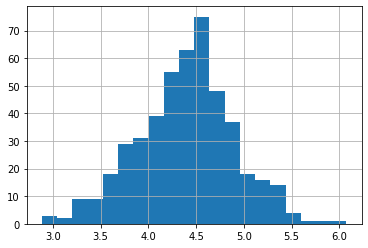

In [266]:
m20overb.predFVCmFEV6h.hist(bins='auto')

creatediffsppratio and creatediffsppnonratio 

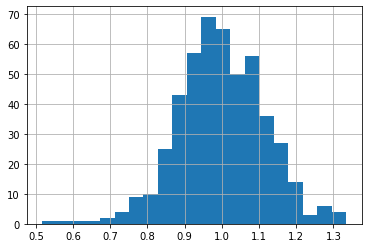

In [267]:
m20overc.FEV6PPh.hist(bins='auto')

In [268]:
m20overb.FEV1PPh.describe()

count    473.000000
mean       0.994674
std        0.146739
min        0.351812
25%        0.915250
50%        0.999995
75%        1.085851
max        1.502538
Name: FEV1PPh, dtype: float64

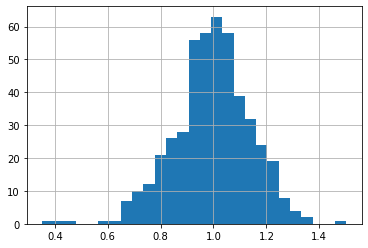

In [269]:
m20overb.FEV1PPh.hist(bins='auto')

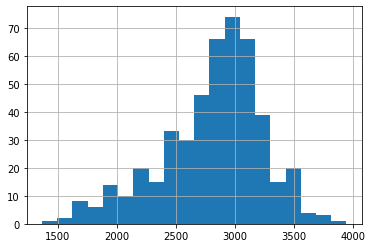

In [270]:
m20overb.FEV1LLNPredh.hist(bins='auto')

Print numbers that are below Hankinson predicted LLN;  for FEV1 it varies from 1.9 to 7.0%, so there are problems with this LLN

In [271]:
def printltllnh (df):
    print ("FEV1, ", df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPredh')), ", ", 
           len(df), ", ", len(df.query('SPPFEV1 < FEV1LLNPredh'))/len(df))
    print ("FVC, ", df.name, ", ",len(df.query('SPPFVC < FVCLLNPredh')), ", ", 
           len(df), ", ", len(df.query('SPPFVC < FVCLLNPredh'))/len(df))
    print ("FEV6, ", df.name, ", ",len(df.query('SPPFEV6 < FEV6LLNPredh')), ", ", 
           len(df), ", ", len(df.query('SPPFEV6 < FEV6LLNPredh'))/len(df))
    print ("PEF, ", df.name, ", ",len(df.query('SPPPEAK < PEFLLNPredh')), ", ", 
           len(df), ", ", len(df.query('SPPPEAK < PEFLLNPredh'))/len(df))
    print ("MMEF, ", df.name, ", ",len(df.query('SPPMMEF < MMEFLLNPredh')), ", ", 
           len(df), ", ", len(df.query('SPPMMEF < MMEFLLNPredh'))/len(df))
  

In [272]:
for y in hnonratioframestoanalyze:
    printltllnh (y)  

FEV1,  m20overb ,  33 ,  473 ,  0.06976744186046512
FVC,  m20overb ,  28 ,  473 ,  0.05919661733615222
FEV6,  m20overb ,  27 ,  473 ,  0.05708245243128964
PEF,  m20overb ,  37 ,  473 ,  0.07822410147991543
MMEF,  m20overb ,  24 ,  473 ,  0.0507399577167019
FEV1,  m20overc ,  34 ,  484 ,  0.07024793388429752
FVC,  m20overc ,  24 ,  484 ,  0.049586776859504134
FEV6,  m20overc ,  26 ,  484 ,  0.05371900826446281
PEF,  m20overc ,  27 ,  484 ,  0.05578512396694215
MMEF,  m20overc ,  22 ,  484 ,  0.045454545454545456
FEV1,  m20overma ,  34 ,  591 ,  0.05752961082910321
FVC,  m20overma ,  37 ,  591 ,  0.06260575296108291
FEV6,  m20overma ,  41 ,  591 ,  0.06937394247038917
PEF,  m20overma ,  34 ,  591 ,  0.05752961082910321
MMEF,  m20overma ,  30 ,  591 ,  0.050761421319796954
FEV1,  f18overb ,  44 ,  931 ,  0.047261009667024706
FVC,  f18overb ,  49 ,  931 ,  0.05263157894736842
FEV6,  f18overb ,  42 ,  931 ,  0.045112781954887216
PEF,  f18overb ,  57 ,  931 ,  0.061224489795918366
MMEF,  f18

In [273]:
m20overb.query('FEV1PPh < .5').HSAITMOR

SEQN
5705     425.0
12643    883.0
39870    835.0
Name: HSAITMOR, dtype: float64

In [274]:
m20overc.FEV6PPh.describe()

count    484.000000
mean       0.999333
std        0.118713
min        0.516701
25%        0.926375
50%        0.994724
75%        1.083583
max        1.334825
Name: FEV6PPh, dtype: float64

In [275]:
m20overb.FEV6PPh.describe()

count    473.000000
mean       0.997540
std        0.137267
min        0.350406
25%        0.918025
50%        1.003207
75%        1.088021
max        1.370130
Name: FEV6PPh, dtype: float64

In [276]:
m20overb.query('FEV6PPh < 0').HSAITMOR

Series([], Name: HSAITMOR, dtype: float64)

m20overb FEV6 - has one -.33, which had HSAITMOR = 9999

In [277]:
m20overma.FEV6PPh.describe()

count    591.000000
mean       1.001969
std        0.115119
min        0.550087
25%        0.929592
50%        1.001033
75%        1.086546
max        1.421370
Name: FEV6PPh, dtype: float64

In [278]:
m20overb.FVCPPh.describe()

count    473.000000
mean       0.997303
std        0.138767
min        0.332898
25%        0.915117
50%        0.999695
75%        1.087606
max        1.379428
Name: FVCPPh, dtype: float64

FVC m20overb FVCPPh min -.418

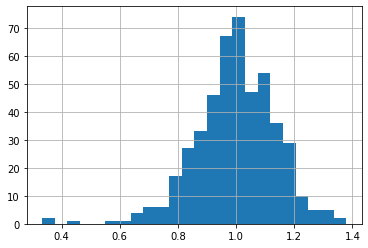

In [279]:
m20overb.FVCPPh.hist(bins='auto')

should look at all the FVC values for m20overb and see if any are negative
or print the FVC and FVCPPh for all of those and see which is off (is a predicted negative)

In [280]:
mlt20ma.FVCPPh.describe()

count    604.000000
mean       0.995454
std        0.108472
min        0.559574
25%        0.916798
50%        0.994209
75%        1.071477
max        1.334031
Name: FVCPPh, dtype: float64

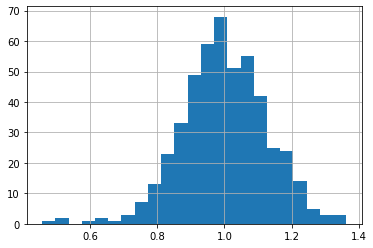

In [281]:
m20overc.FEV1PP.hist(bins='auto')

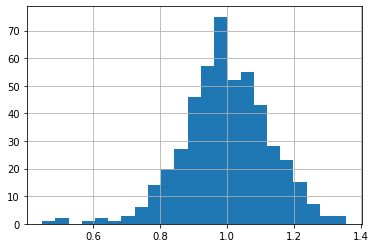

In [282]:
m20overc.FEV1PPh.hist(bins='auto')

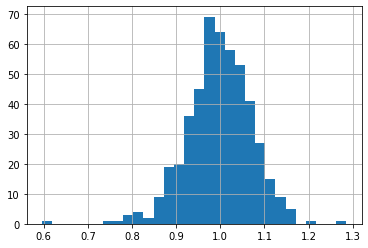

In [283]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

In [284]:
def creatediffs(df):
    df['FEV1PPdiff'] = df.FEV1PP - df.FEV1PPh
    df['FVCPPdiff'] = df.FVCPP - df.FVCPPh
    df['PEFRPPdiff'] = df.PEFRPP - df.PEFPPh
    df['MMEFPPdiff'] = df.MMEFPP - df.MMEFPPh
    df['FEV6PPdiff'] = df.FEV6PP - df.FEV6PPh
    df['FEV1OFVCPPdiff'] = df.FEV1OFVCPP - df.FEV1OFVCPPh
    df['FEV1OFEV6PPdiff'] = df.FEV1OFEV6PP - df.FEV1OFEV6PPh 
    

In [285]:
m20overc.loc[:,"PEFPPh"].mean()

0.994219286027218

Has FEV1PP, PEFPPh, but not PEFPP - it is PEFR

In [286]:
m20overc.loc[:,"PEFRPP"].mean()

0.9998228772342782

In [287]:
for y in hnonratioframestoanalyze:
    print (y.name)
    creatediffs(y)

m20overb
m20overc
m20overma
f18overb
f18overc
f18overma
mlt20b
mlt20c
mlt20ma
flt18b
flt18c
flt18ma


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

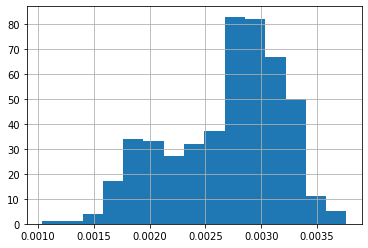

In [288]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

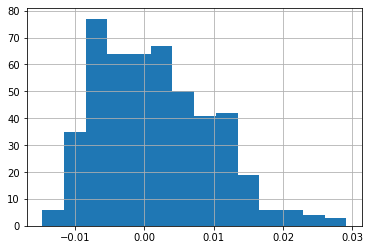

In [289]:
m20overc.FEV1PPdiff.hist(bins='auto')

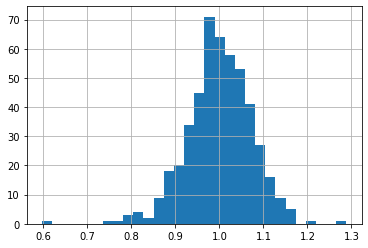

In [290]:
m20overc.FEV1OFVCPP.hist(bins='auto')

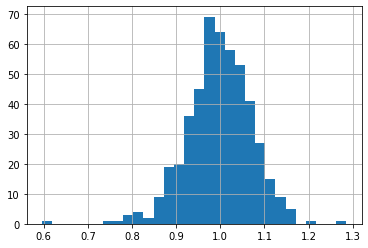

In [291]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

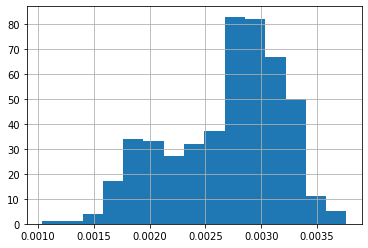

In [292]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

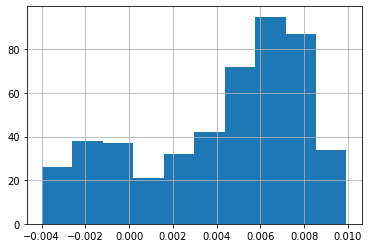

In [293]:
m20overc.FEV1OFEV6PPdiff.hist(bins='auto')

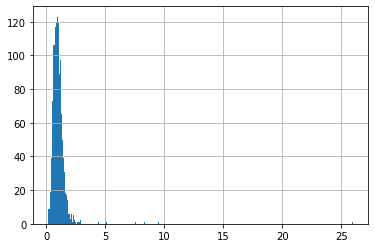

In [294]:
mallma.FEF75PP.hist(bins='auto')

There is male with FEF75PP >5 (about 27)

In [295]:
mallma.query('FEF75PP > 5')  #.HSAITMOR

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,HYE1G,HYE1H,HYG2,HYG4,HYG7,HYG8,HYG12,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1OFVCPred,PEFROFVCPred,FEV1OFEV6Pred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFVCPred,FEV6OFVCPred,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1372,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,3,1,1,79,2,NaN,NaN,955.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,79.0,2.0,NaN,NaN,NaN,1004.0,6.0,3742.0,1485.0,1648.0,1648.0,1648.0,1648.0,3231.0,2159.0,1.0,4.0,14:05,1.0,23.0,1.0,532.75,956.0,160.3,85.0,61.85,1,3.0,1.0,955.0,NaN,NaN,NaN,1.000000,1.000000,2.270631,2.270631,2.270631,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.368579,1.065117,1.288940,1.009725,0.796300,1.144826,1.060352,0.885551,1.832921,0.883172,1.825052,2.057055,0.994676,1.003396,1.117008,0.737222,0.887736,0.923206,0.826506,5.967494,25.966076,0.085698,1475.370418,2235.417771,4215.215577,1785.083771,1993.935668,541.433311,83.146950,11.668817,2235.417771,0.794745,1.204164,1.376897,1.295674,6352.808333,6860.191667
10828,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,3,1,1,66,2,NaN,NaN,800.0,NaN,2.0,2.0,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,66.0,2.0,NaN,NaN,NaN,1013.0,6.0,9756.0,3389.0,4026.0,4132.0,4221.0,4222.0,6360.0,4938.0,1.0,4.0,15:30,5.0,23.0,1.0,4089.42,801.0,164.9,87.4,70.00,1,3.0,1.0,800.0,NaN,NaN,NaN,0.953577,0.953802,2.310753,2.311301,2.423249,0.978683,0.999763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.257872,1.111512,1.200017,1.063259,0.893887,1.093578,1.048239,0.887849,1.828486,0.884765,1.818765,2.045266,0.996474,1.004291,1.507871,1.183102,1.361430,1.315297,1.254118,2.907860,9.536937,0.402080,2669.989596,3568.584182,7165.994895,3141.494731,3365.710909,2187.175108,517.776308,12.435336,3568.584182,0.902882,1.150729,1.263841,1.204884,6635.166667,7058.333333
32859,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,3,1,1,72,2,NaN,NaN,871.0,NaN,2.0,2.0,2.0,2.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,72.0,2.0,NaN,NaN,NaN,1015.0,7.0,7479.0,2067.0,2453.0,2925.0,3178.0,3260.0,1929.0,404.0,1.0,4.0,11:12,10.0,24.0,1.0,1555.92,872.0,156.4,82.2,58.75,1,3.0,1.0,871.0,NaN,NaN,NaN,0.752454,0.771869,2.294172,2.353367,3.048920,0.897239,0.974847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.009281,1.090825,0.981867,1.065773,1.098591,1.013698,1.027380,0.886789,1.830533,0.884029,1.821667,2.050707,0.995644,1.003878,1.372581,1.262450,1.432506,1.369051,1.348515,1.782042,5.142633,0.810575,1787.144503,2582.280877,5220.921526,2136.517135,2356.666896,1082.466263,78.558973,12.336925,2582.280877,1.043659,1.134703,1.014673,0.986367,6505.828333,6967.571667
46282,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,3,1,1,68,2,NaN,NaN,816.0,NaN,2.0,2.0,2.0,2.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,68.0,2.0,NaN,NaN,NaN,1011.0,10.0,8129.0,2826.0,3437.0,3845.0,3977.0,4070.0,3945.0,1447.0,1.0,4.0,11:03,13.0,24.0,1.0,1213.57,817.0,156.9,83.7,64.70,1,3.0,1.0,816.0,NaN,NaN,NaN,0.844472,0.864219,1.997297,2.044003,2.365144,0.944717,0.977150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.118123,0.958218,1.089998,0.936959,0.867808,1.058242,1.025714,0.887496,1.829168,0.884519,1.819732,2.047080,0.996197,1.004154,1.619203,1.378621,1.339641,1.528201,1.451508,2

There is a black with MMEFPP < 0 with age 963 months. 80 yo with MMEF 826, but MMEFPP -32.97 and FEF75 PP of - 0.28 - age is over 80 so should be excluded since over 80 years old which is 960; so delete those over 80 or HSAITMOR > 960
There is a black with FEF75 < 0 with HSAITMOR 937

In [296]:
mallb.query('MMEFPP < 0')  #.HSAITMOR

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,HYE1G,HYE1H,HYG2,HYG4,HYG7,HYG8,HYG12,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1OFVCPred,PEFROFVCPred,FEV1OFEV6Pred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFVCPred,FEV6OFVCPred,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [297]:
mallb.query('FEF75PP < 0')  #.HSAITMOR

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,HYE1G,HYE1H,HYG2,HYG4,HYG7,HYG8,HYG12,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1OFVCPred,PEFROFVCPred,FEV1OFEV6Pred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFVCPred,FEV6OFVCPred,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17920,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,3,1,78,2,NaN,NaN,937.0,NaN,2.0,2.0,2.0,1.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,78.0,2.0,NaN,NaN,NaN,1005.0,8.0,3289.0,1530.0,2259.0,2932.0,3229.0,3536.0,1215.0,256.0,1.0,4.0,10:00,17.0,22.0,1.0,1566.52,937.0,163.7,80.8,62.9,2,2.0,3.0,937.0,NaN,NaN,NaN,0.638857,0.699597,0.930147,1.018582,1.455954,0.829186,0.913179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854468,0.428189,0.892877,0.449152,0.509857,0.931037,0.95629,0.881165,2.058293,0.880416,2.055099,2.325787,0.989788,1.001227,1.509108,1.554854,0.766229,1.569329,1.544442,2.066647,-2.609675,1.445289,1496.910758,2274.168263,4292.447732,1868.314541,2090.723251,587.908897,-98.096521,11.762352,2274.168263,0.507737,0.492798,0.852203,0.889494,6454.836667,6878.9125


In [298]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].mean()

0.004222234953342257

In [299]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].std()

0.0036716461824911188

In [300]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].count()

484

In [301]:
hdifflist =  ['FEV1PPdiff', 'FEV6PPdiff', 'FVCPPdiff','PEFRPPdiff','MMEFPPdiff','FEV1OFVCPPdiff', 'FEV1OFEV6PPdiff']

In [302]:
print(hdifflist)

['FEV1PPdiff', 'FEV6PPdiff', 'FVCPPdiff', 'PEFRPPdiff', 'MMEFPPdiff', 'FEV1OFVCPPdiff', 'FEV1OFEV6PPdiff']


In [303]:
m20overc.loc[:,"FEV1OFVC"].count()

484


for y in hdifflist:
  print(m20overc.name, ", ", y, ", ", df.loc[:,y].count())
  


Now want to get mean, stdev of the diffs for our caucasian and Hankinson caucasian (then black, then MA)
First need create combinued data set of all caucasian allc - mlt20c, m20overc, flt18c, f18overc (then black, MA)
Then get mean, stdev for each parameter - for each parameter print mean, stdev, n

create allc - mlt20c, m20overc, flt18c, f18overc
create allb - mlt20b, m20overb, flt18b, f18overb
create allma - mlt20ma, m20overma, flt18ma, f18overma
create all - allc, allb, allma


In [304]:
allc = pd.concat([mlt20c, m20overc, flt18c, f18overc])
allb = pd.concat([mlt20b, m20overb, flt18b, f18overb])
allma = pd.concat([mlt20ma, m20overma, flt18ma, f18overma])
all = pd.concat([allc, allb, allma])

In [305]:
allc.name = "allc"
allb.name = "allb"
allma.name = "allma"
all.name = "all"

In [306]:
print (allc.name)

allc


allb.describe  #- does allc only have 495????; why is same as allb, allma
need set dataframe first

In [307]:
print("dataframe, variable, mean, STD, count")
ftoa = [allc, allb, allma, all]
for df in ftoa:
    print (df.name)
    for y in hdifflist:
        print(df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())

  


dataframe, variable, mean, STD, count
allc
allc ,  FEV1PPdiff ,  0.004162646203387906 ,  0.016532378175375912 ,  2295
allc ,  FEV6PPdiff ,  0.003205538227688537 ,  0.010277385534005437 ,  2295
allc ,  FVCPPdiff ,  0.0030559513994229274 ,  0.009563185710263744 ,  2295
allc ,  PEFRPPdiff ,  0.006652804025097206 ,  0.01652673508807982 ,  2295
allc ,  MMEFPPdiff ,  0.00804344076882898 ,  0.0419629033150193 ,  2295
allc ,  FEV1OFVCPPdiff ,  -0.00038055740837962835 ,  0.00492204369761634 ,  2295
allc ,  FEV1OFEV6PPdiff ,  -8.849800670756103e-05 ,  0.00539634452761475 ,  2295
allb
allb ,  FEV1PPdiff ,  0.003415192780831364 ,  0.01238450560727667 ,  2600
allb ,  FEV6PPdiff ,  0.0006752107063211178 ,  0.0121646712436478 ,  2600
allb ,  FVCPPdiff ,  0.0004314643729669416 ,  0.012088721010317745 ,  2600
allb ,  PEFRPPdiff ,  0.005758664363612377 ,  0.018696761482212762 ,  2600
allb ,  MMEFPPdiff ,  0.01299620995405251 ,  0.03205988489364504 ,  2600
allb ,  FEV1OFVCPPdiff ,  0.0010747579706335579 

want to compare MA %predicted of Caucasian and black %predicted to Caucasian
so create new variables for each parameter variablePPc for all groups (Caucasian should be 1.00)
then show mean, STD, count for each variable
expect MA to be close to Caucasian, Black to be 10% lower for non-ratio, and similar for ratio
for all groups, for all variables, create PPc
Then show the PPc

In [308]:
PPclist = ['FEV10FVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']

In [309]:
def createvarsppc(df, dfa):  #calculate variable c - the %predicted using caucasian predicteds 
 #   from results ratio vn which is the caucasian from results ratio caucasian
    vn = dfa.name + 'FEV1OFVC'
    df['FEV1OFVCPPc'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPc']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFEV6'
    df['PEFROFEV6PPc']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFEV1'
    df['PEFROFEV1PPc'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV3OFVC'
    df['FEV3OFVCPPc'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV6OFVC'
    df['FEV6OFVCPPc'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    
    vn = dfa.name + 'SPPFEV1'
    df['FEV1PPc'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFVC'
    df['FVCPPc'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPPEAK'
    df['PEFRPPc'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEV3'
    df['FEV3PPc'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEV6'
    df['FEV6PPc'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPMMEF'
    df['MMEFPPc'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEF75'
    df['FEF75PPc'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPEXPIR'
    df['EXPIRPPc'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [310]:
#framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
#                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
#                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]
dfa = m20overc
fta = [m20overb, m20overcma, m20overc, m20overma]
for y in fta:
    createvarsppc(y,dfa)
dfa = f18overc
fta = [f18overb, f18overcma, f18overc, f18overma]
for y in fta:
    createvarsppc(y, dfa)
dfa = mlt20c
fta = [mlt20b, mlt20cma, mlt20c, mlt20ma]
for y in fta:
    createvarsppc(y, dfa)
dfa = flt18c
fta = [flt18b, flt18cma, flt18c, flt18ma]
for y in fta:
    createvarsppc(y, dfa)          
          

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Create PPvalues array which has mean and stdev of the percent predicted variables

In [311]:
# create df PPcvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPcvalues= pd.DataFrame(columns = column_names)
PPcvalues.name = 'PPcvalues'
print (PPcvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPcvalues = PPcvalues.append(df2, ignore_index=True)
  # now set index   
PPcvalues.set_index('dfnvarn', inplace=True)


Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbFEV1OFVCPPc , m20overb ,  FEV1OFVCPPc ,  1.0262627489102905 ,  0.08187532982933225 ,  473
m20overbFEV1OFEV6PPc , m20overb ,  FEV1OFEV6PPc ,  1.0244564838532144 ,  0.07368680151305818 ,  473
m20overbPEFROFVCPPc , m20overb ,  PEFROFVCPPc ,  0.9999997258427631 ,  0.18021687146203375 ,  473
m20overbPEFROFEV6PPc , m20overb ,  PEFROFEV6PPc ,  1.1236028245416645 ,  0.19848623969003473 ,  473
m20overbPEFROFEV1PPc , m20overb ,  PEFROFEV1PPc ,  1.0951325654808528 ,  0.1594268843990109 ,  473
m20overbFEV3OFVCPPc , m20overb ,  FEV3OFVCPPc ,  1.0036373044498665 ,  0.03435092833263571 ,  473
m20overbFEV6OFVCPPc , m20overb ,  FEV6OFVCPPc ,  1.0015670178023244 ,  0.018988155106910713 ,  473
m20overbFEV1PPc , m20overb ,  FEV1PPc ,  0.8554284048353508 ,  0.12692593696472682 ,  473
m20overbFVCPPc , m20overb ,  FVCPPc ,  0.8366495475226268 ,  0.11744016882483428 ,  473
m20ov

In [312]:
PPcvalues

,dfname,var,mean,std,count
dfnvarn,,,,,
m20overbFEV1OFVCPPc,m20overb,NaN,1.026263,0.081875,473
m20overbFEV1OFEV6PPc,m20overb,NaN,1.024456,0.073687,473
m20overbPEFROFVCPPc,m20overb,NaN,1.000000,0.180217,473
m20overbPEFROFEV6PPc,m20overb,NaN,1.123603,0.198486,473
m20overbPEFROFEV1PPc,m20overb,NaN,1.095133,0.159427,473
...,...,...,...,...,...
flt18maFEV3PPc,flt18ma,NaN,1.015568,0.121538,558
flt18maFEV6PPc,flt18ma,NaN,1.014868,0.122385,558
flt18maMMEFPPc,flt18ma,NaN,1.080693,0.237936,558


Now print the mean, std, count for all the dataframes and PPc variables

In [313]:
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


dfvarname, dataframe, variable, mean, STD, count
m20overbFEV1OFVCPPc , m20overb ,  FEV1OFVCPPc ,  1.0262627489102905 ,  0.08187532982933225 ,  473
m20overbFEV1OFEV6PPc , m20overb ,  FEV1OFEV6PPc ,  1.0244564838532144 ,  0.07368680151305818 ,  473
m20overbPEFROFVCPPc , m20overb ,  PEFROFVCPPc ,  0.9999997258427631 ,  0.18021687146203375 ,  473
m20overbPEFROFEV6PPc , m20overb ,  PEFROFEV6PPc ,  1.1236028245416645 ,  0.19848623969003473 ,  473
m20overbPEFROFEV1PPc , m20overb ,  PEFROFEV1PPc ,  1.0951325654808528 ,  0.1594268843990109 ,  473
m20overbFEV3OFVCPPc , m20overb ,  FEV3OFVCPPc ,  1.0036373044498665 ,  0.03435092833263571 ,  473
m20overbFEV6OFVCPPc , m20overb ,  FEV6OFVCPPc ,  1.0015670178023244 ,  0.018988155106910713 ,  473
m20overbFEV1PPc , m20overb ,  FEV1PPc ,  0.8554284048353508 ,  0.12692593696472682 ,  473
m20overbFVCPPc , m20overb ,  FVCPPc ,  0.8366495475226268 ,  0.11744016882483428 ,  473
m20overbPEFRPPc , m20overb ,  PEFRPPc ,  0.9391803588079738 ,  0.1877071733758454

# Create PPvalues array which has mean and stdev of the percent predicted variables

In [314]:
# create df PPvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPvalues= pd.DataFrame(columns = column_names)
PPvalues.name = 'PPvalues'
print (PPvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, mallcma]
# use framestoanalye instead
ftoa = framestoanalyze
PPlist = ['FEV1OFVCPP', 'FEV1OFEV6PP', 'PEFROFVCPP', 'PEFROFEV6PP', 
           'PEFROFEV1PP', 'FEV3OFVCPP', 'FEV6OFVCPP', 'FEV1PP', 'FVCPP',
           'PEFRPP', 'FEV3PP', 'FEV6PP', 'MMEFPP', 'FEF75PP', 'EXPIRPP']
for df in ftoa:
 #   print (df.name)
    for y in PPlist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPvalues = PPvalues.append(df2, ignore_index=True)
  # now set index   
PPvalues.set_index('dfnvarn', inplace=True)


Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbFEV1OFVCPP , m20overb ,  FEV1OFVCPP ,  0.9999964621800432 ,  0.07966907648684543 ,  473
m20overbFEV1OFEV6PP , m20overb ,  FEV1OFEV6PP ,  0.9999979179706231 ,  0.07192364806733423 ,  473
m20overbPEFROFVCPP , m20overb ,  PEFROFVCPP ,  0.9999997258427631 ,  0.18021687146203375 ,  473
m20overbPEFROFEV6PP , m20overb ,  PEFROFEV6PP ,  0.9999991873582785 ,  0.17659202664703935 ,  473
m20overbPEFROFEV1PP , m20overb ,  PEFROFEV1PP ,  0.999989607559258 ,  0.14540021383582177 ,  473
m20overbFEV3OFVCPP , m20overb ,  FEV3OFVCPP ,  1.0000004776757008 ,  0.03337826455891527 ,  473
m20overbFEV6OFVCPP , m20overb ,  FEV6OFVCPP ,  1.0000001027736887 ,  0.018176721642468464 ,  473
m20overbFEV1PP , m20overb ,  FEV1PP ,  1.0000766945135626 ,  0.1475065057953357 ,  473
m20overbFVCPP , m20overb ,  FVCPP ,  0.999931519982958 ,  0.13924793939841518 ,  473
m20overbPEFRPP , m20overb

In [315]:
PPvalues

,dfname,var,mean,std,count
dfnvarn,,,,,
m20overbFEV1OFVCPP,m20overb,NaN,0.999996,0.079669,473
m20overbFEV1OFEV6PP,m20overb,NaN,0.999998,0.071924,473
m20overbPEFROFVCPP,m20overb,NaN,1.000000,0.180217,473
m20overbPEFROFEV6PP,m20overb,NaN,0.999999,0.176592,473
m20overbPEFROFEV1PP,m20overb,NaN,0.999990,0.145400,473
...,...,...,...,...,...
fallmaFEV3PP,fallma,NaN,0.999975,0.128425,1551
fallmaFEV6PP,fallma,NaN,0.999807,0.127579,1551
fallmaMMEFPP,fallma,NaN,1.002437,0.265410,1551


Now compare our LLNX (meanX * (1 - 1.645 * STDPPX) to Hankinson LLN (from equation) for each variable and each group.  Have already created variables Xllnh from Hankinson equation.  Need create variables Xlln using our equation.  Create an array which contains the above values (similar to ratiovars)

In [316]:
df = m20overb
vn = df.name + 'FEV1OFVCPP'
df['FEV1OFVCLLNPred'] = (df.FEV1OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


First create our LLNPred variables which equal predicted mean * (1 - 1.645 * stdpp) for all datatframes for all variables 
problem with mallcmaFEV1OFVCPP
Then create new fields of the LLN diffs for Hankinson variables
Then compare those LLN diffs
Then could also create array with Hansen LLN


In [317]:
def createvarsllnPred(df):  #calculate the lln for each variable
    vn = df.name + 'FEV1OFVCPP'
    df['FEV1OFVCLLNPred'] = (df.FEV1OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = dfa.name + 'PEFROFVCPP'
    df['PEFROFVCLLNPred'] = (df.PEFROFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))         
    vn = df.name + 'FEV1OFEV6PP'
    df['FEV1OFEV6LLNPred'] = (df.FEV1OFEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFVCPP'
    df['PEFROFVCLLNPred'] = (df.PEFROFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFEV6PP'
    df['PEFROFEV6LLNPred'] = (df.PEFROFEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFEV1PP'
    df['PEFROFEV1LLNPred'] = (df.PEFROFEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV3OFVCPP'
    df['FEV3OFVCLLNPred'] = (df.FEV3OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV6OFVCPP'
    df['FEV6OFVCLLNPred'] = (df.FEV6OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = df.name + 'FEV1PP'
    df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FVCPP'
    df['FVCLLNPred'] = (df.FVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'PEFRPP'
    df['PEFRLLNPred'] = (df.PEFRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEV3PP'
    df['FEV3LLNPred'] = (df.FEV3Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEV6PP'
    df['FEV6LLNPred'] = (df.FEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'MMEFPP'
    df['MMEFLLNPred'] = (df.MMEFPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEF75PP'
    df['FEF75LLNPred'] = (df.FEF75Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'EXPIRPP'
    df['EXPIRLLNPred'] = (df.EXPIRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))

for y in framestoanalyze:
    print (y.name)

In [318]:
for y in framestoanalyze:
    createvarsllnPred(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Now similar to Hankinson show how many are below the LLN  *****
Also need do upperlimitnormal for PEFR, PEFRPP/FVCPP;  but can use``````

Also do upperlimit normal

In [319]:
def printltlln (df):
    print ("FEV1, ", df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df))
    print ("FVC, ", df.name, ", ",len(df.query('SPPFVC < FVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFVC < FVCLLNPred'))/len(df))
    print ("FEV6, ", df.name, ", ",len(df.query('SPPFEV6 < FEV6LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV6 < FEV6LLNPred'))/len(df))
    print ("PEFR, ", df.name, ", ",len(df.query('SPPPEAK < PEFRLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPPEAK < PEFRLLNPred'))/len(df))
    print ("MMEF, ", df.name, ", ",len(df.query('SPPMMEF < MMEFLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPMMEF < MMEFLLNPred'))/len(df))
    print ("FEV1OFVC, ", df.name, ", ",len(df.query('FEV1OFVC < FEV1OFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('FEV1OFVC < FEV1OFVCLLNPred'))/len(df))
    print ("PEFROFVC, ", df.name, ", ",len(df.query('PEFROFVC < PEFROFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('PEFROFVC < PEFROFVCLLNPred'))/len(df))

Results in FEV1 near 5%, FVC 9%, MMEF 10%, PEFROFVC 6% to 2%; suggesting that for MMEF skewed to right and PEFROFVC skewed to left
So do scatter plot of PEFROFVC and of MMEF - see if skewed

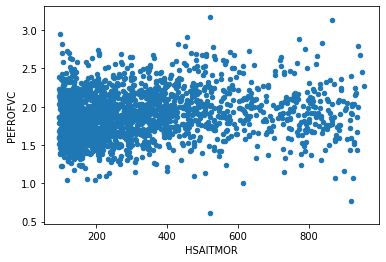

In [320]:
mallcma.plot.scatter('HSAITMOR','PEFROFVC')

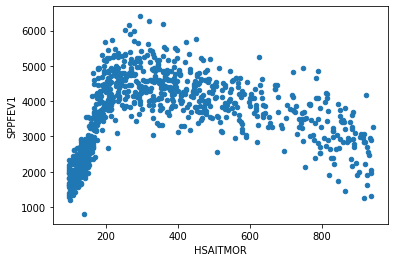

In [321]:
mallc.plot.scatter('HSAITMOR', 'SPPFEV1')

In [322]:
print ("parameter, dataframe, #<LLN, count, fraction < LLN")
for y in framestoanalyze:
    printltlln (y)

parameter, dataframe, #<LLN, count, fraction < LLN
FEV1,  m20overb ,  25 ,  473 ,  0.052854122621564484
FVC,  m20overb ,  44 ,  473 ,  0.09302325581395349
FEV6,  m20overb ,  45 ,  473 ,  0.09513742071881606
PEFR,  m20overb ,  43 ,  473 ,  0.09090909090909091
MMEF,  m20overb ,  48 ,  473 ,  0.1014799154334038
FEV1OFVC,  m20overb ,  88 ,  473 ,  0.18604651162790697
PEFROFVC,  m20overb ,  30 ,  473 ,  0.06342494714587738
FEV1,  m20overcma ,  53 ,  1075 ,  0.04930232558139535
FVC,  m20overcma ,  64 ,  1075 ,  0.059534883720930236
FEV6,  m20overcma ,  60 ,  1075 ,  0.05581395348837209
PEFR,  m20overcma ,  62 ,  1075 ,  0.05767441860465116
MMEF,  m20overcma ,  83 ,  1075 ,  0.07720930232558139
FEV1OFVC,  m20overcma ,  326 ,  1075 ,  0.3032558139534884
PEFROFVC,  m20overcma ,  36 ,  1075 ,  0.03348837209302326
FEV1,  m20overc ,  24 ,  484 ,  0.049586776859504134
FVC,  m20overc ,  25 ,  484 ,  0.05165289256198347
FEV6,  m20overc ,  25 ,  484 ,  0.05165289256198347
PEFR,  m20overc ,  24 ,  484 

Create LLN diff variables

In [323]:
def createllndiffs(df):
    df['FEV1llndiff'] = df.FEV1LLNPred - df.FEV1LLNPredh
    df['FVCllndiff'] = df.FVCLLNPred - df.FVCLLNPredh
    df['PEFRllndiff'] = df.PEFRLLNPred - df.PEFLLNPredh
    df['MMEFllndiff'] = df.MMEFLLNPred - df.MMEFLLNPredh
    df['FEV6llndiff'] = df.FEV6LLNPred - df.FEV6LLNPredh
    df['FEV1OFVCllndiff'] = df.FEV1OFVCLLNPred - df.FEV1OFVCLLNPredh
    df['FEV1OFEV6llndiff'] = df.FEV1OFEV6LLNPred - df.FEV1OFEV6LLNPredh

In [324]:
for y in hnonratioframestoanalyze:
    print (y.name)
    createllndiffs(y)

m20overb
m20overc
m20overma
f18overb
f18overc
f18overma
mlt20b
mlt20c
mlt20ma
flt18b
flt18c
flt18ma


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

now print values of llndiffs for nonratio variables (need also do for hratioframestoanalyze)

In [325]:
hdifflist =  ['FEV1llndiff', 'FEV6llndiff', 'FVCllndiff','PEFRllndiff','MMEFllndiff'] #,'FEV1OFVCllndiff', 'FEV1OFEV6llndiff']

print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
ftoa = hnonratioframestoanalyze
for df in ftoa:
 #   print (df.name)
    for y in hdifflist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


dfvarname, dataframe, variable, mean, STD, count
m20overbFEV1llndiff , m20overb ,  FEV1llndiff ,  -73.65307581530453 ,  70.13889729003557 ,  473
m20overbFEV6llndiff , m20overb ,  FEV6llndiff ,  133.75392690110573 ,  29.550178585119603 ,  473
m20overbFVCllndiff , m20overb ,  FVCllndiff ,  133.6091672137472 ,  18.55770640106104 ,  473
m20overbPEFRllndiff , m20overb ,  PEFRllndiff ,  252.88231569079332 ,  136.90426629094384 ,  473
m20overbMMEFllndiff , m20overb ,  MMEFllndiff ,  308.747648102701 ,  211.64446667704328 ,  473
m20overcFEV1llndiff , m20overc ,  FEV1llndiff ,  -84.66331592078623 ,  116.91185381338704 ,  484
m20overcFEV6llndiff , m20overc ,  FEV6llndiff ,  7.0144146202694495 ,  97.06280043711949 ,  484
m20overcFVCllndiff , m20overc ,  FVCllndiff ,  7.165882387081654 ,  83.91564507154554 ,  484
m20overcPEFRllndiff , m20overc ,  PEFRllndiff ,  -150.1164062243909 ,  172.78642678284297 ,  484
m20overcMMEFllndiff , m20overc ,  MMEFllndiff ,  181.56440376871205 ,  327.945013708382 , 

LLN = 

First create new variables LLNdiff = our percent predicted - Hankinson percent predicted

Then see what those are
Then could use the other reference LLN
Also could see what % are below LLN

Or could cycle through range of height, range of age then compare our LLN to Hankinson LLN
i.e. for each dataframe to analyze  for each variable in hdifflist, for height 

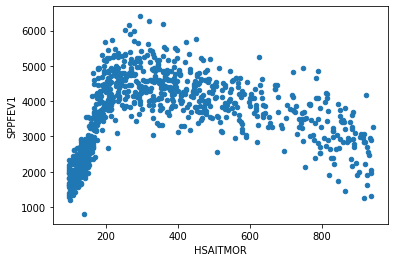

In [326]:
mallc.plot.scatter('HSAITMOR', 'SPPFEV1')

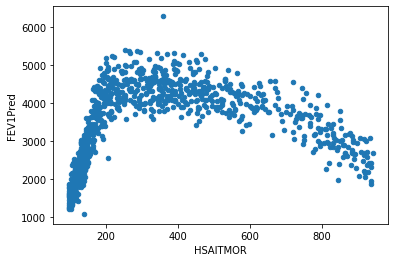

In [327]:
mallc.plot.scatter('HSAITMOR', 'FEV1Pred')

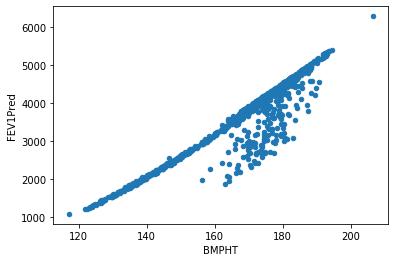

In [328]:
mallc.plot.scatter('BMPHT', 'FEV1Pred')

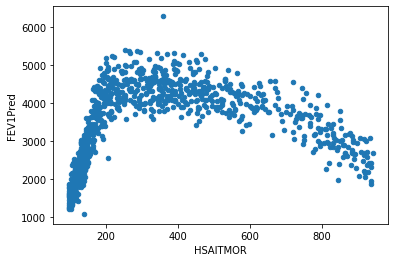

In [329]:
mallc.plot.scatter('HSAITMOR', 'FEV1Pred')

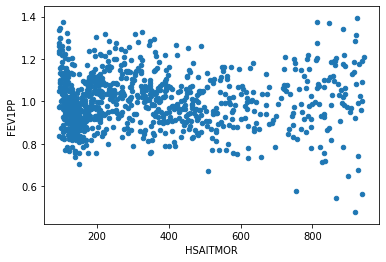

In [330]:
mallc.plot.scatter('HSAITMOR', 'FEV1PP')

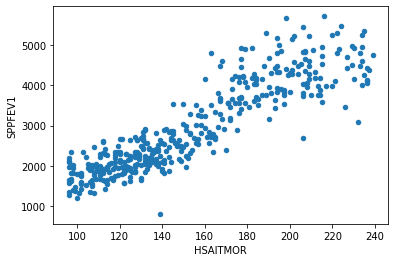

In [331]:
mlt20c.plot.scatter('HSAITMOR', 'SPPFEV1')

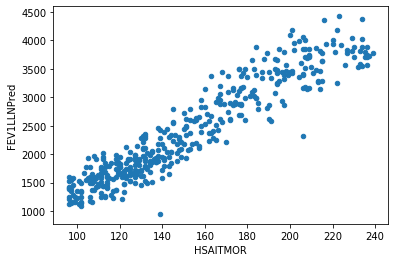

In [332]:
mlt20c.plot.scatter('HSAITMOR', 'FEV1LLNPred')

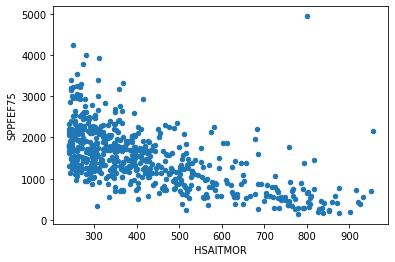

In [333]:
m20overma.plot.scatter('HSAITMOR', 'SPPFEF75')

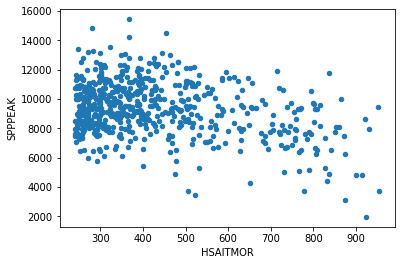

In [334]:
m20overma.plot.scatter('HSAITMOR', 'SPPPEAK')

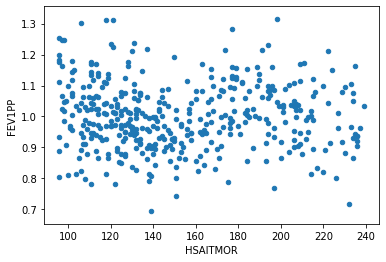

In [335]:
mlt20c.plot.scatter('HSAITMOR', 'FEV1PP')

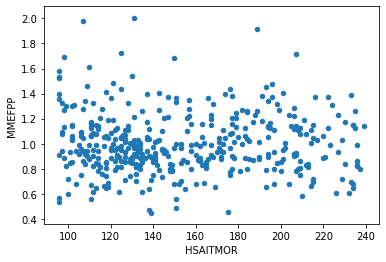

In [336]:
mlt20c.plot.scatter('HSAITMOR', 'MMEFPP')

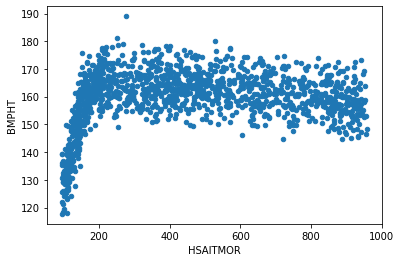

In [337]:
fallc.plot.scatter('HSAITMOR', 'BMPHT')

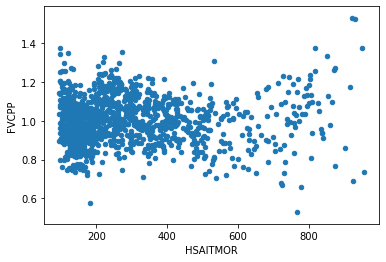

In [338]:
mallma.plot.scatter('HSAITMOR', 'FVCPP')

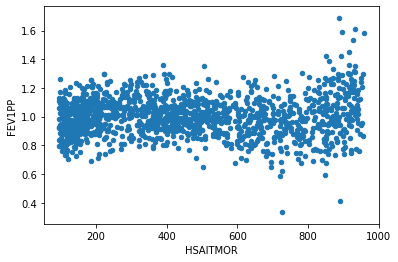

In [339]:
fallc.plot.scatter('HSAITMOR', 'FEV1PP')

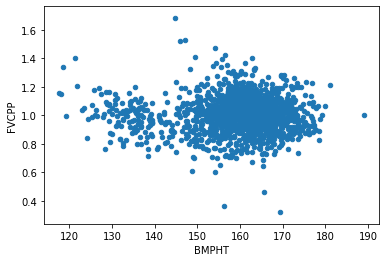

In [340]:
fallc.plot.scatter('BMPHT', 'FVCPP')

In [341]:
# create df PPvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPvalues= pd.DataFrame(columns = column_names)
PPvalues.name = 'PPvalues'
print (PPvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPvalues = LLNvalues.append(df2, ignore_index=True)
  # now set index   
PPvalues.set_index('dfnvarn', inplace=True)

Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbFEV1OFVCPPc , m20overb ,  FEV1OFVCPPc ,  1.0262627489102905 ,  0.08187532982933225 ,  473


NameError: name 'LLNvalues' is not defined

In [ ]:
from scipy import stats